# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Athaya Salsabil
- **Email:** athayasalsabil2002@gmail.com
- **ID Dicoding:** athaya_salsabil_1er4

## Menentukan Pertanyaan Bisnis

- Bagaimana tren udara bulanan di Beijing selama lima tahun terakhir?
- Bagaimana tren udara harian di Beijing selama lima bulan terakhir
- Bagaimana korelasi antara polutan dengan variabel meteorologi?
- Bagaimana kualitas udara di berbagai stasiun di Beijing?
- Bagaimana tren partikel per-jam?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### membaca file csv

Terdapat 12 file csv yang memuat data mengenai Air Quality di 12 wilayah

In [2]:
#kita coba baca salah satunya
aotizhongxin_df = pd.read_csv("data/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


#### Penejelasan setiap kolom

1. No: Nomor baris atau indeks data.
2. year: Tahun pengukuran air quality.
3. month: Bulan pengukuran air quality (dalam format numerik).
4. day: Hari pengukuran air quality (dalam format numerik).
5. hour: Jam pengukuran air quality (dalam format 24 jam).
6. PM2.5: Konsentrasi partikulat materi dengan diameter kurang dari 2.5 mikrometer dalam udara (μg/m³).
7. PM10: Konsentrasi partikulat materi dengan diameter kurang dari 10 mikrometer dalam udara (μg/m³).
8. SO2: Konsentrasi sulfur dioksida dalam udara (μg/m³).
9. NO2: Konsentrasi nitrogen dioksida dalam udara (μg/m³).
10. CO: Konsentrasi karbon monoksida dalam udara (μg/m³).
11. O3: Konsentrasi ozon dalam udara (μg/m³).
12. TEMP: Temperatur udara (°C).
13. PRES: Tekanan udara (hPa).
14. DEWP: Titik embun (°C). suhu saat mengembun, semakin tinggi titik embunnya, semakin banyak uap air yang terkandung dalam udara, dan semakin "lembab" udara tersebut.
15. RAIN: Jumlah hujan (mm).
16. wd: Arah angin.
17. WSPM: Kecepatan angin (m/s).
18. station: Nama stasiun pengukuran air quality.

#### Menyatukan semua csv air quality

Karena semua csvnya memiliki jumlah baris dan kolom yang sama, maka akan disatukan menggunakan concat

In [3]:
changping_df = pd.read_csv("data/PRSA_Data_Changping_20130301-20170228.csv")
dingling_df = pd.read_csv("data/PRSA_Data_Dingling_20130301-20170228.csv")
shunyi_df = pd.read_csv("data/PRSA_Data_Shunyi_20130301-20170228.csv")
dongsi_df = pd.read_csv("data/PRSA_Data_Dongsi_20130301-20170228.csv")
guanyuan_df = pd.read_csv("data/PRSA_Data_Guanyuan_20130301-20170228.csv")
gucheng_df = pd.read_csv("data/PRSA_Data_Gucheng_20130301-20170228.csv")
huairou_df = pd.read_csv("data/PRSA_Data_Huairou_20130301-20170228.csv")
nongzhanguan_df = pd.read_csv("data/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
tiantan_df = pd.read_csv("data/PRSA_Data_Tiantan_20130301-20170228.csv")
wanliu_df = pd.read_csv("data/PRSA_Data_Wanliu_20130301-20170228.csv")
wanshouxigong_df = pd.read_csv("data/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

In [4]:
all_df = pd.concat([aotizhongxin_df, changping_df, dingling_df, shunyi_df, dongsi_df, guanyuan_df,
                      gucheng_df, huairou_df, nongzhanguan_df, tiantan_df, wanliu_df, wanshouxigong_df], ignore_index=True)
all_df.head()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Assessing Data

#### Mengecek info all_df

In [5]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


#### Mengecek nilai Null di all_df

In [6]:
all_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

terdapat banyak nilai null di setiap parameter pada all_df

#### Mengecek duplikasi pada all_df

In [7]:
print("Jumlah duplikasi: ", all_df.duplicated().sum())

Jumlah duplikasi:  0


#### Mengecek kesalahan nilai lainnya

In [8]:
all_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


### Cleaning Data

Pada proses ini kita perlu mengisi nilai null yang ada pada all_df. Karena data merupakan hasil pengukuran tiap jam, maka diasumsikan nilai yang kosong bisa jadi sama dengan nilai yang sebelumnya (belum berubah). Maka dari itu, kita menggunakan ffill untuk mengisi nilai null.

In [9]:
all_df.ffill(inplace=True)

In [10]:
all_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Dirata-ratakan per bulannya untuk mendapatkan tren udara bulanan

In [11]:
#ini untuk nantinya buat line chart trend polusi se-Beijing (perbulan) selama lima tahun terakhir
#all_drop_df = all_df.drop(columns = {"station"})
all_month = all_df.groupby(by = ['year', 'month'] ).agg({
            "PM2.5" : "mean",
            "PM10" : "mean",
            "SO2" : "mean",
            "NO2" : "mean",
            "CO" : "mean",
            "O3" : "mean",
            "TEMP": "mean",
            "PRES": "mean",
            "WSPM": "mean"}).sort_values(by = ['year', 'month'], ascending = True)
all_month = all_month.reset_index()
all_month['time'] = all_month["month"].astype(str) + "/" + all_month["year"].astype(str)
all_month.head(15)

,year,month,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,WSPM,time
0,2013,3,104.677755,131.223398,38.571489,67.223549,1444.345094,56.461765,5.992249,1012.224373,1.886414,3/2013
1,2013,4,62.458449,95.976157,20.683256,45.687191,895.740625,62.599339,12.380058,1007.811817,2.333310,4/2013
2,2013,5,82.882616,134.347110,25.432108,50.109445,956.934252,89.137449,21.676691,1002.652912,1.811694,5/2013
3,2013,6,101.759549,115.844502,13.602667,48.193081,1317.866782,74.486415,23.583426,999.639838,1.287350,6/2013
4,2013,7,67.652330,76.492496,7.219652,38.610878,978.784722,78.953510,27.108826,995.501680,1.316913,7/2013
5,2013,8,60.837030,77.793683,6.908745,39.063647,889.359319,82.444853,26.904816,998.767305,1.382773,8/2013
6,2013,9,76.133565,96.404630,10.199189,51.518836,1156.809491,47.841783,20.240683,1008.849711,1.171447,9/2013
7,2013,10,91.980063,112.995744,15.641972,63.373548,1213.116039,27.922407,12.984017,1015.799754,1.258210,10/2013
8,2013,11,73.828241,96.244907,21.845555,55.823151,1464.108796,23.722832,5.963900,1016.536910,1.821146,11/2013
9,2013,12,78.198141,96.107639,38.475512,60.264744,1879.693100,21.691071,0.054167,1019.612130,1.728360,12/2013


### Dirata-ratakan perharinya untuk mendapatkan tren udara harian

In [12]:
all_day = all_df.groupby(by = ['year', 'month', 'day'] ).agg({
            "PM2.5" : "mean",
            "PM10" : "mean",
            "SO2" : "mean",
            "NO2" : "mean",
            "CO" : "mean",
            "O3" : "mean",
            "TEMP": "mean",
            "PRES": "mean",
            "WSPM": "mean",
            "RAIN": "mean",
            "DEWP": "mean"}).sort_values(by = ['year', 'month', 'day'], ascending = True)
all_day = all_day.reset_index()
all_day['date'] = all_day['year'].astype(str) + '-' + all_day['month'].astype(str) + '-' + all_day['day'].astype(int).astype(str)
all_day

,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,WSPM,RAIN,DEWP,date
0,2013,3,1,7.326389,12.204861,9.180556,22.322917,404.861111,68.236111,1.173958,1026.569792,2.917708,0.0,-20.148611,2013-3-1
1,2013,3,2,31.475694,40.496528,31.775239,56.210013,940.236111,32.580279,0.260417,1026.552778,1.145139,0.0,-16.271875,2013-3-2
2,2013,3,3,79.291667,111.104167,49.288194,75.986111,1771.663194,22.788194,5.257292,1014.215278,1.463194,0.0,-12.325347,2013-3-3
3,2013,3,4,21.822917,40.354167,18.875983,40.663609,727.034722,56.833333,9.610764,1017.263194,2.227083,0.0,-12.773264,2013-3-4
4,2013,3,5,126.215278,159.236111,70.947917,102.319444,2020.909722,79.527778,6.630556,1010.551389,0.992014,0.0,-7.916319,2013-3-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2017,2,24,25.406250,38.642361,9.604167,44.562500,718.055556,45.677083,4.876736,1019.349306,1.902083,0.0,-11.351736,2017-2-24
1457,2017,2,25,11.340278,21.472222,5.552083,30.107639,465.972222,59.329861,7.040278,1017.160417,2.051042,0.0,-10.586111,2017-2-25
1458,2017,2,26,27.690972,44.826389,9.975694,50.246528,701.388889,42.399306,6.769097,1018.659375,1.601042,0.0,-8.005556,2017-2-26
1459,2017,2,27,68.909722,98.555556,17.465278,76.545139,1349.652778,27.694444,7.752778,1015.493056,1.525347,0.0,-7.107292,2017-2-27


In [13]:
all_day["date"] = pd.to_datetime(all_day["date"])

### nama-nama station

In [14]:
all_df.station.unique()

array(['Aotizhongxin', 'Changping', 'Dingling', 'Shunyi', 'Dongsi',
       'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

### Dirata-ratakan perharinya dengan nama stasiun untuk mendapatkan tren udara harian per stasiun

In [15]:
all_day_station = all_df.groupby(by = ['year', 'month', 'day', 'station'] ).agg({
            "PM2.5" : "mean",
            "PM10" : "mean",
            "SO2" : "mean",
            "NO2" : "mean",
            "CO" : "mean",
            "O3" : "mean",
            "TEMP": "mean",
            "PRES": "mean",
            "WSPM": "mean",
            "RAIN": "mean",
            "DEWP": "mean"}).sort_values(by = ['year', 'month', 'day', 'station'], ascending = True)
all_day_station = all_day_station.reset_index()
all_day_station['date'] = all_day_station['year'].astype(str) + '-' + all_day_station['month'].astype(str) + '-' + all_day_station['day'].astype(int).astype(str)
all_day_station

,year,month,day,station,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,WSPM,RAIN,DEWP,date
0,2013,3,1,Aotizhongxin,7.125000,10.750000,11.708333,22.583333,429.166667,63.875000,1.391667,1026.875000,3.254167,0.0,-18.745833,2013-3-1
1,2013,3,1,Changping,5.083333,18.958333,16.041667,15.333333,387.500000,77.791667,0.812500,1023.858333,2.133333,0.0,-19.583333,2013-3-1
2,2013,3,1,Dingling,6.375000,6.291667,3.000000,4.375000,204.166667,81.958333,0.812500,1023.858333,2.133333,0.0,-19.583333,2013-3-1
3,2013,3,1,Dongsi,6.416667,9.875000,8.250000,28.083333,391.666667,72.250000,1.325000,1028.783333,3.308333,0.0,-21.466667,2013-3-1
4,2013,3,1,Guanyuan,7.541667,11.666667,8.500000,28.500000,400.000000,63.166667,1.391667,1026.875000,3.254167,0.0,-18.745833,2013-3-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17527,2017,2,28,Nongzhanguan,18.166667,26.125000,7.916667,37.833333,562.500000,53.958333,10.958333,1014.887500,2.058333,0.0,-12.783333,2017-2-28
17528,2017,2,28,Shunyi,20.708333,28.500000,7.125000,39.666667,579.166667,57.291667,9.250000,1015.550000,2.025000,0.0,-10.429167,2017-2-28
17529,2017,2,28,Tiantan,14.875000,32.708333,6.166667,40.166667,520.833333,63.666667,10.958333,1014.887500,2.058333,0.0,-12.783333,2017-2-28
17530,2017,2,28,Wanliu,9.958333,25.583333,7.458333,40.916667,479.166667,54.791667,10.516667,1013.345833,1.800000,0.0,-12.266667,2017-2-28


In [16]:
all_day_station["date"] = pd.to_datetime(all_day_station["date"])

### air polutan rata2 pertahun

In [17]:
# Tingkat polusi selama 5 tahun hari pada tanggal 2013 sampai 2017 (5 data pertama)
all_year = all_df.groupby(by = ['year'] ).agg({
            "PM2.5" : "mean",
            "PM10" : "mean",
            "SO2" : "mean",
            "NO2" : "mean",
            "CO" : "mean",
            "O3" : "mean"}).sort_values(by = ['year'], ascending = True)
all_year = all_year.reset_index()
all_year['time'] = all_year["year"].astype(str)
all_year.head(10)

,year,PM2.5,PM10,SO2,NO2,CO,O3,time
0,2013,80.060327,103.372118,19.900829,52.008784,1219.820193,56.583182,2013
1,2014,86.664664,117.177623,21.379256,54.710410,1275.392884,58.258812,2014
2,2015,79.512680,103.704323,12.996570,48.446636,1262.917618,59.107265,2015
3,2016,72.363189,94.811077,9.763519,46.147778,1138.387978,58.508652,2016
4,2017,92.568326,110.872999,18.113583,57.191443,1620.227166,39.966690,2017


### melihat korelasi antar variabel

In [18]:
# Pengambilan dataframe untuk korelasi
correlation_df = all_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].copy()
correlation_df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4
1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7
2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0


In [19]:
correlation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PM2.5   420768 non-null  float64
 1   PM10    420768 non-null  float64
 2   SO2     420768 non-null  float64
 3   NO2     420768 non-null  float64
 4   CO      420768 non-null  float64
 5   O3      420768 non-null  float64
 6   TEMP    420768 non-null  float64
 7   PRES    420768 non-null  float64
 8   DEWP    420768 non-null  float64
 9   RAIN    420768 non-null  float64
 10  WSPM    420768 non-null  float64
dtypes: float64(11)
memory usage: 35.3 MB


In [20]:
korelasi = correlation_df.corr(method = "pearson")
korelasi

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.876213,0.469207,0.654277,0.773015,-0.144707,-0.130454,0.019145,0.112820,-0.014153,-0.269565
PM10,0.876213,1.000000,0.453617,0.639971,0.686354,-0.107736,-0.096779,-0.017285,0.066883,-0.026234,-0.177755
SO2,0.469207,0.453617,1.000000,0.476857,0.514696,-0.162745,-0.316100,0.218482,-0.262355,-0.039387,-0.107568
NO2,0.654277,0.639971,0.476857,1.000000,0.682958,-0.454530,-0.269755,0.170195,-0.028799,-0.043276,-0.392141
CO,0.773015,0.686354,0.514696,0.682958,1.000000,-0.302272,-0.328008,0.192233,-0.066732,-0.013269,-0.286503
O3,-0.144707,-0.107736,-0.162745,-0.454530,-0.302272,1.000000,0.582970,-0.442192,0.310183,0.023140,0.287950
TEMP,-0.130454,-0.096779,-0.316100,-0.269755,-0.328008,0.582970,1.000000,-0.813310,0.820279,0.037629,0.032725
PRES,0.019145,-0.017285,0.218482,0.170195,0.192233,-0.442192,-0.813310,1.000000,-0.750293,-0.060941,0.065323
DEWP,0.112820,0.066883,-0.262355,-0.028799,-0.066732,0.310183,0.820279,-0.750293,1.000000,0.086248,-0.296651
RAIN,-0.014153,-0.026234,-0.039387,-0.043276,-0.013269,0.023140,0.037629,-0.060941,0.086248,1.000000,0.020979


### Melihat jumlah rata-rata partikel udara perjam

In [21]:

# Mengubah kolom waktu menjadi tipe data datetime
all_df['datetime'] = pd.to_datetime(all_df[['year', 'month', 'day', 'hour']])

# Mengonversi jam menjadi format string
all_df['hour_str'] = all_df['datetime'].dt.strftime('%H:%M')

# Penggabungan berdasarkan rentang waktu
jam_df = all_df.groupby(by="hour_str").agg({
        "PM2.5":"mean",
        "PM10" :"mean"
    }).reset_index()

print(jam_df)


   hour_str      PM2.5        PM10
0     00:00  87.962320  115.419673
1     01:00  87.099013  112.193127
2     02:00  85.094872  107.898660
3     03:00  82.554033  102.955881
4     04:00  79.817870   98.222268
5     05:00  76.878548   94.266587
6     06:00  74.651780   92.645580
7     07:00  73.809263   94.289163
8     08:00  74.821030   98.803457
9     09:00  76.432797  101.230818
10    10:00  77.391364  101.169119
11    11:00  77.548637   99.790378
12    12:00  77.019342   97.560244
13    13:00  76.520865   95.811225
14    14:00  75.874635   95.709845
15    15:00  74.959640   96.919045
16    16:00  74.762075   99.491992
17    17:00  75.775359  103.714573
18    18:00  78.161932  110.333271
19    19:00  82.627236  117.205202
20    20:00  86.764933  122.325468
21    21:00  89.003873  123.469279
22    22:00  89.226956  121.252031
23    23:00  88.849823  118.820272


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren udara bulanan di Beijing selama lima tahun terakhir?

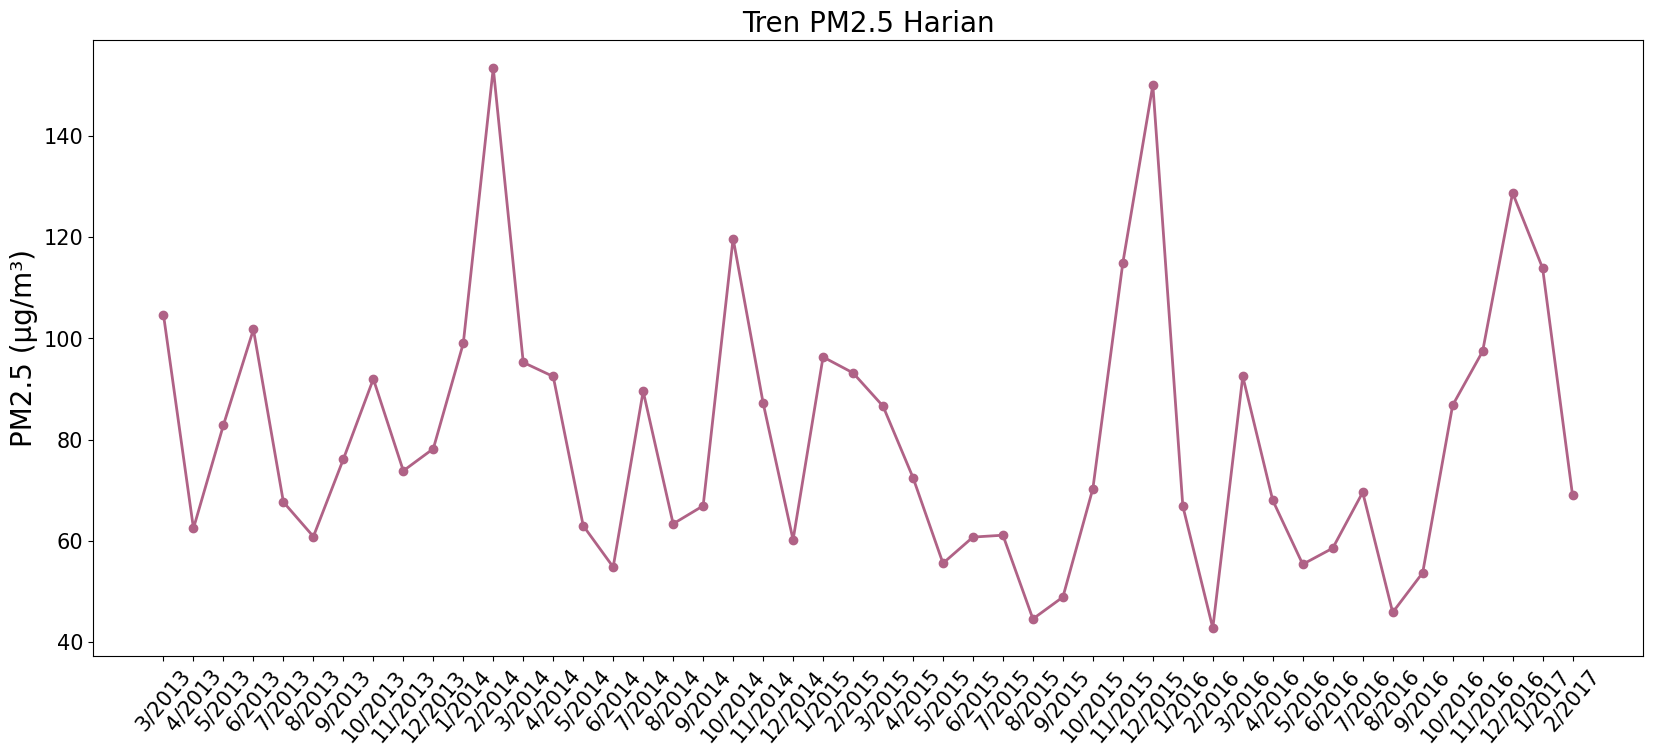

Penjelasan mengenai PM2.5:
 PM2.5 adalah partikel dengan diameter aerodinamis sama atau kurang dari 2,5μm. Menurut WHO, konsentrasi PM2.5 yang baik adalah <= 15μg/m³


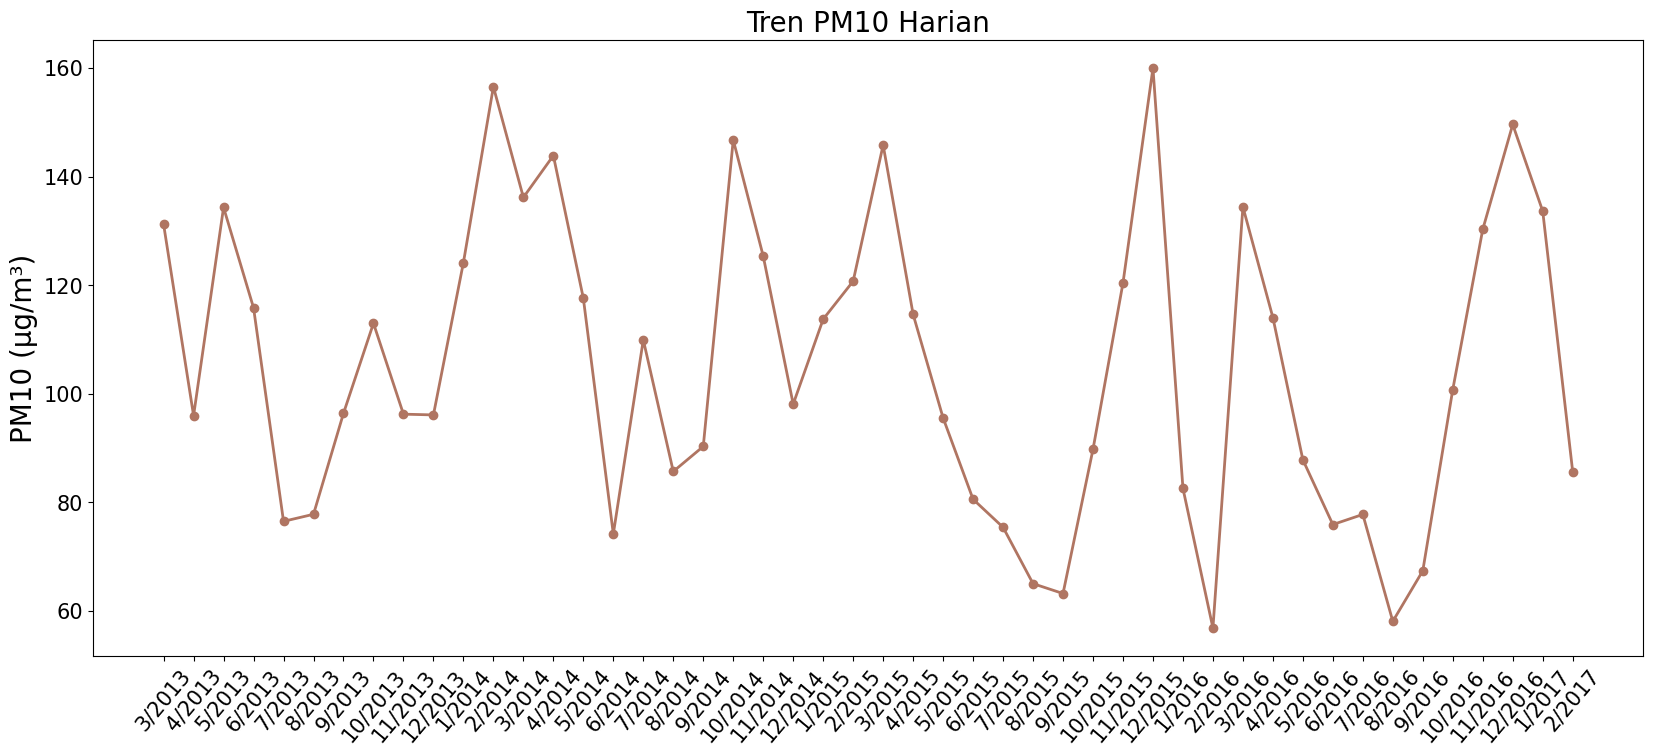

Penjelasan mengenai PM10:
PM10 adalah partikel dengan diameter aerodinamis sama atau kurang dari 10μm. Menurut WHO, konsentrasi PM10 yang baik adalah <= 45μg/m³


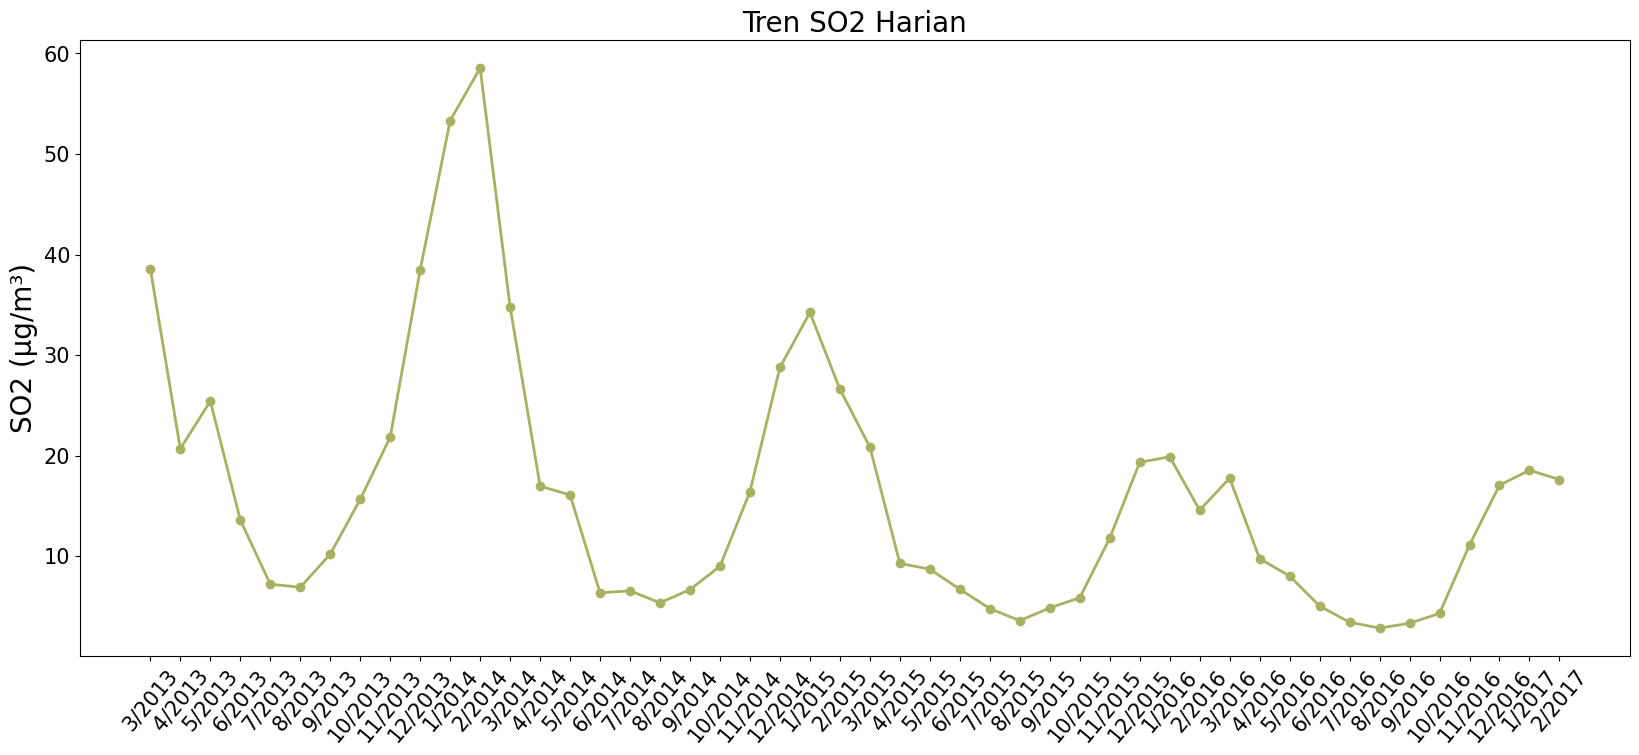

Penjelasan mengenai SO2:
Menurut WHO, konsentrasi sulfur dioksida (SO2) yang baik adalah <= 40 µg/m³


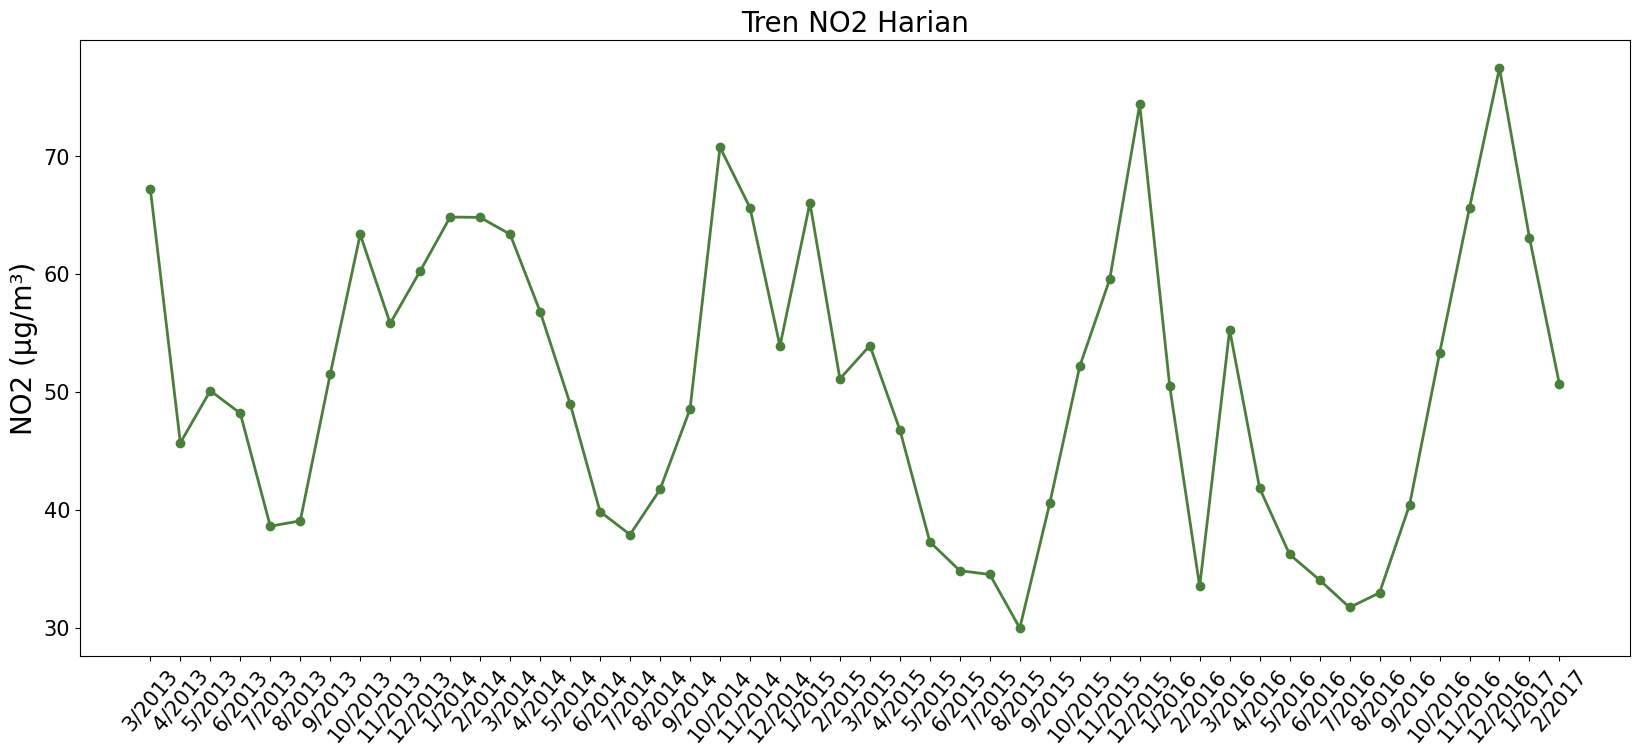

Penjelasan mengenai NO2:
Menurut WHO, konsentrasi Nitrogen DIoksida adalah <= 100 µg/m³


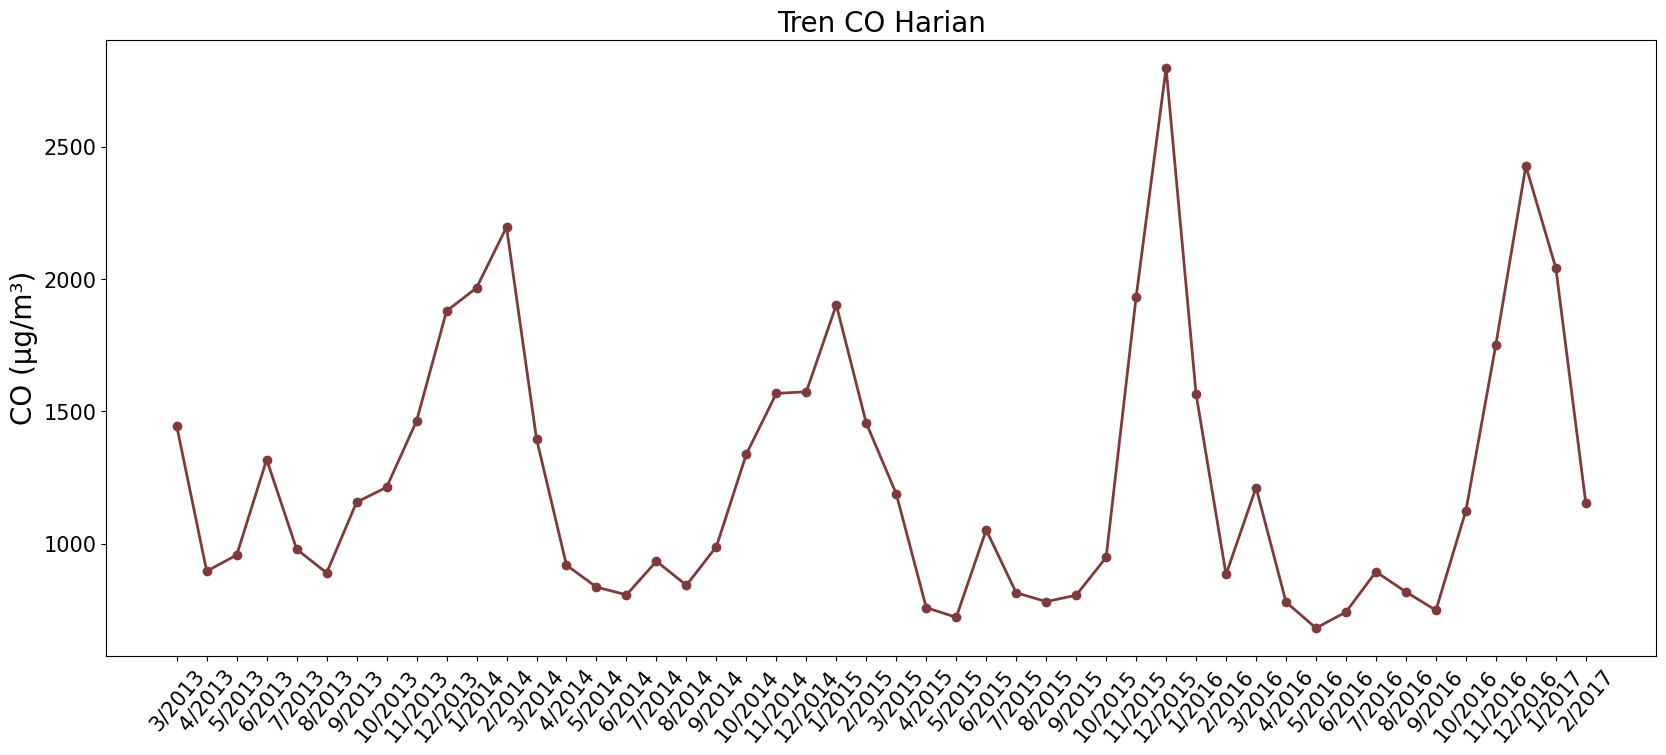

Penjelasan mengenai CO:
Menurut WHO, kosentrasi Karbon Monoksida (CO) adalah <= 4000µg/m³


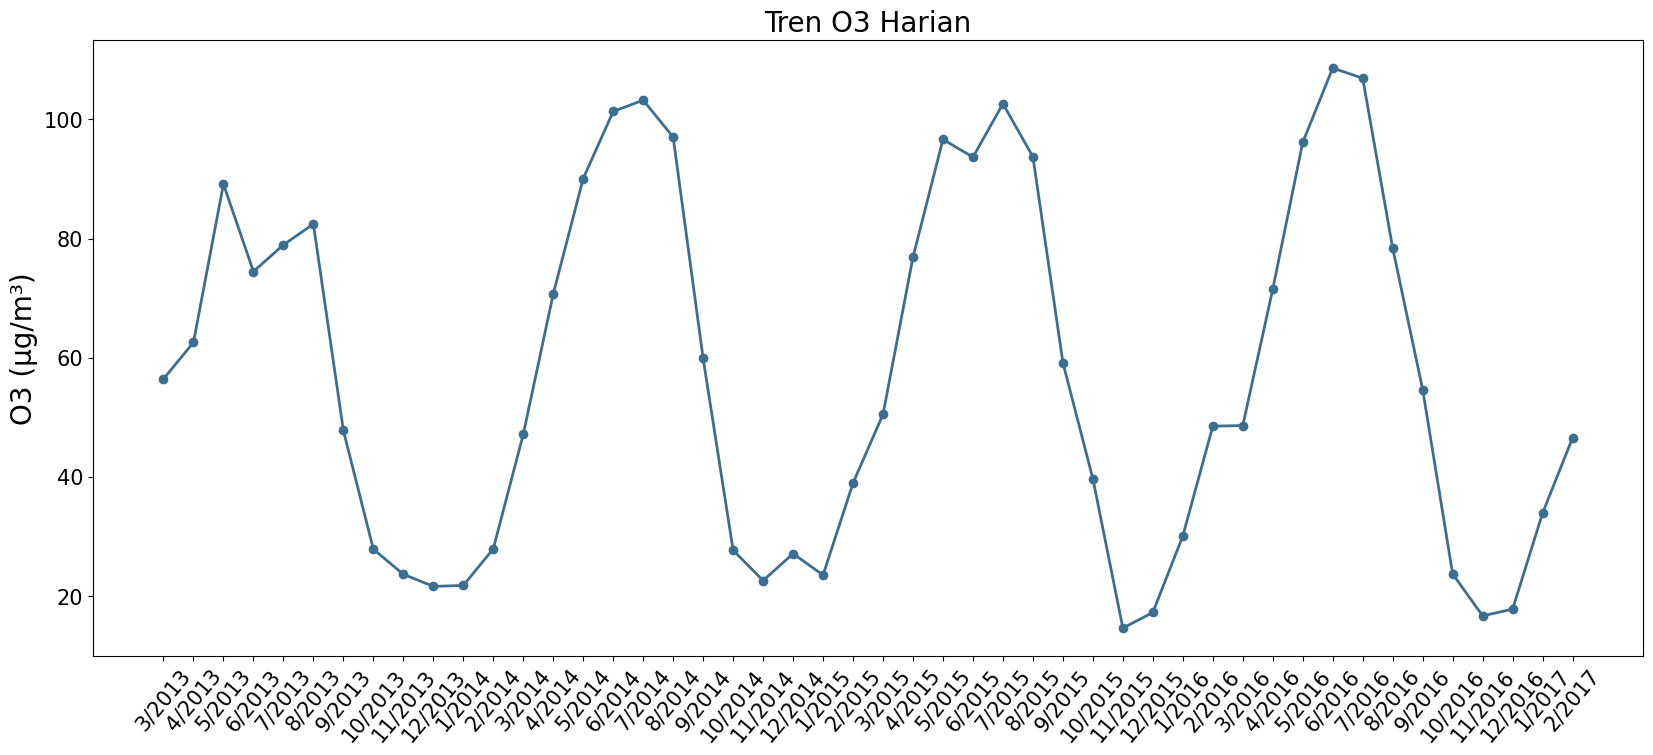

Penjelasan mengenai O3:
Menurut WHO, konsentrasi Ozone (O3) yang baik adalah <= 100μg/m³


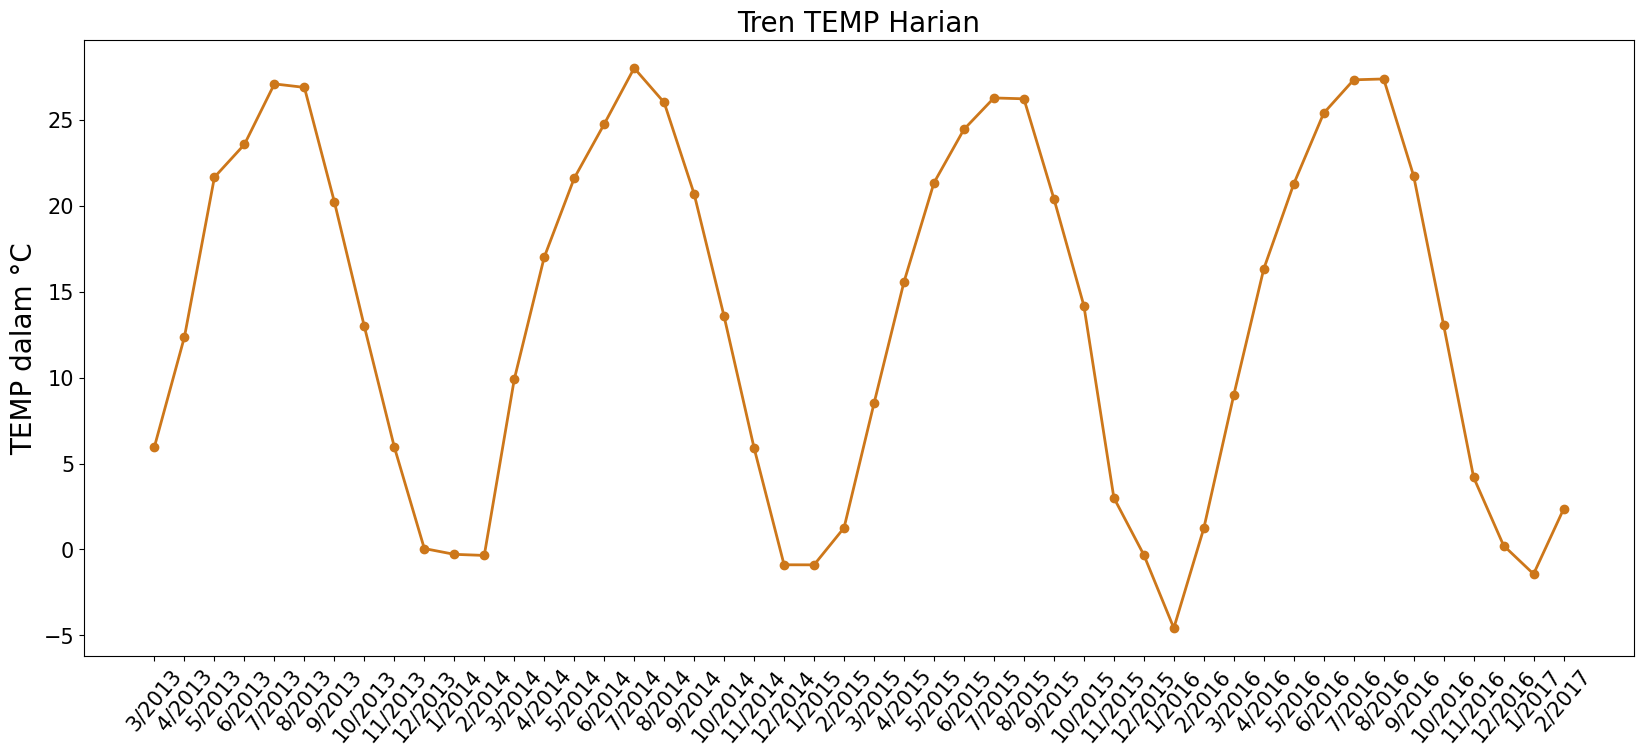

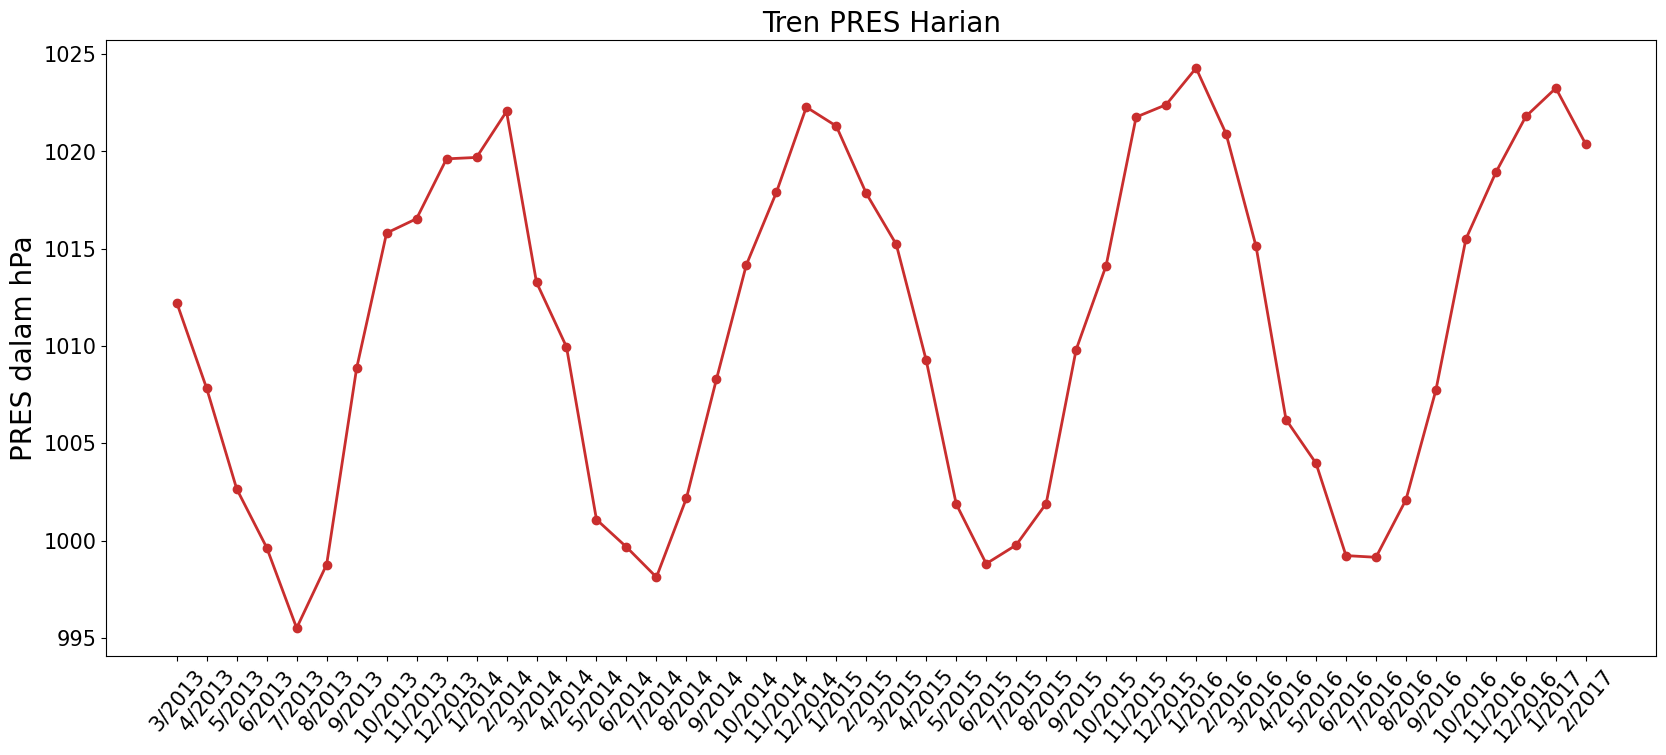

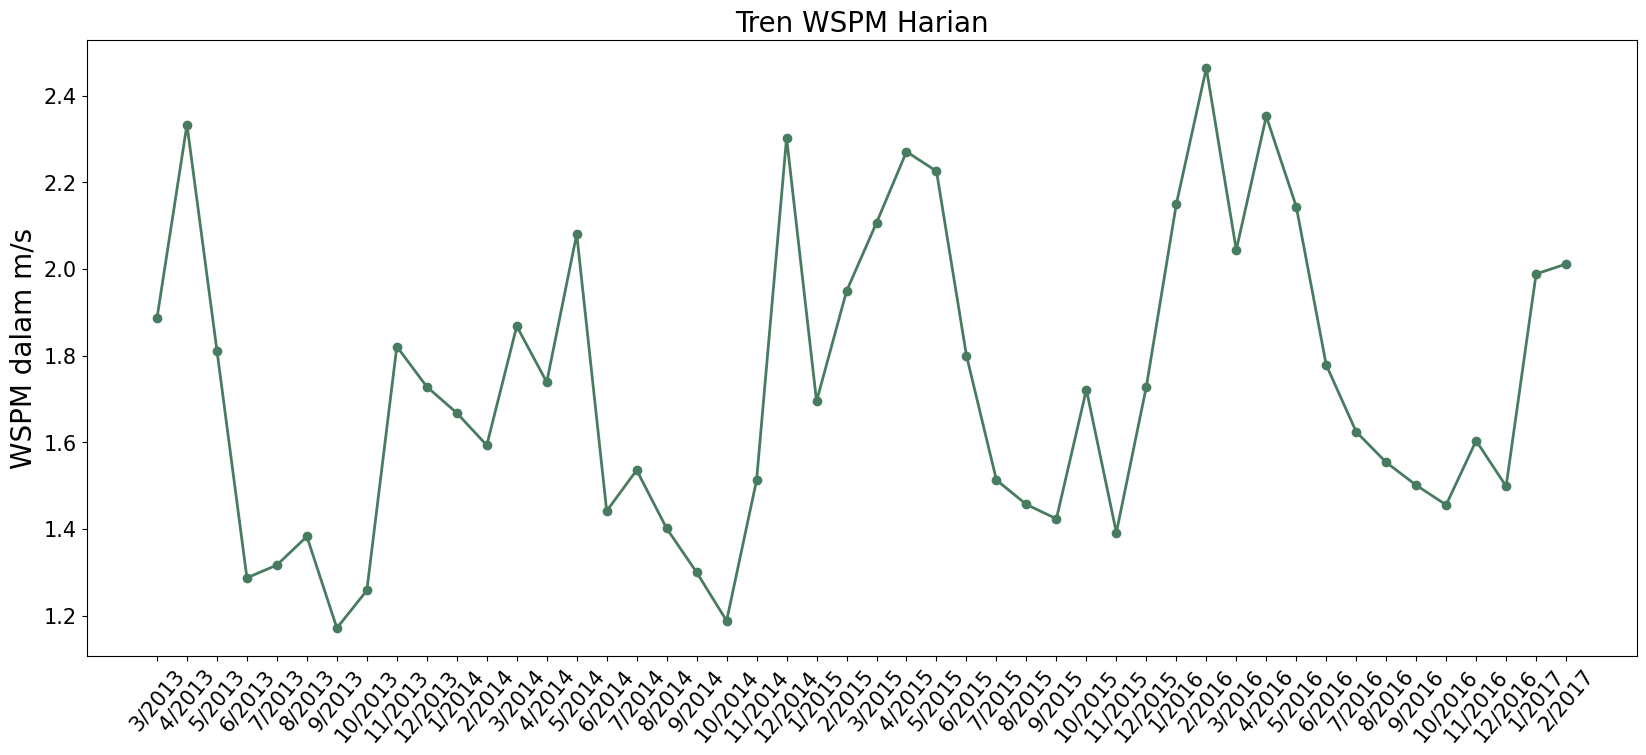

In [22]:
# Definisikan variabel dan warna yang sesuai
variables = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "WSPM"]
colors = ["#B06286", "#B07562", "#AAB062", "#497F3B", "#7F3B3B", "#3C6F8F", "#CD771A", "#C92E2E", "#487C60"]
PM25_ = " PM2.5 adalah partikel dengan diameter aerodinamis sama atau kurang dari 2,5μm. Menurut WHO, konsentrasi PM2.5 yang baik adalah <= 15μg/m³"
PM10_ = "PM10 adalah partikel dengan diameter aerodinamis sama atau kurang dari 10μm. Menurut WHO, konsentrasi PM10 yang baik adalah <= 45μg/m³"
SO2_ = "Menurut WHO, konsentrasi sulfur dioksida (SO2) yang baik adalah <= 40 µg/m³"
NO2_ = "Menurut WHO, konsentrasi Nitrogen DIoksida adalah <= 100 µg/m³"
CO_ = "Menurut WHO, kosentrasi Karbon Monoksida (CO) adalah <= 4000µg/m³"
O3_ = "Menurut WHO, konsentrasi Ozone (O3) yang baik adalah <= 100μg/m³"
penjelasan = {
    "PM2.5": PM25_,
    "PM10": PM10_,
    "SO2": SO2_,
    "NO2": NO2_,
    "CO": CO_,
    "O3": O3_
}

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#main_df.loc[:, 'date'] = pd.to_datetime(main_df['date'])
# Loop untuk membuat plot untuk setiap variabel
for variable, color in zip(variables, colors):
    plt.figure(figsize=(20, 8))
    plt.plot(
        all_month["time"],
        all_month[variable],
        marker='o', 
        linewidth=2,
        color=color  # Gunakan warna yang sesuai dengan variabel
    )
    plt.tick_params(axis='y', labelsize=15)
    plt.tick_params(axis='x', labelsize=15, rotation=50 )
    plt.ylabel(f"{variable} (μg/m³)" if variable in ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
                else f"{variable} dalam °C" if variable == "TEMP"
                else f"{variable} dalam hPa" if variable == "PRES"
                else f"{variable} dalam m/s", fontsize=20)
    plt.title(f"Tren {variable} Harian", fontsize=20)
    plt.show()
    if variable in ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]:
        print(f"Penjelasan mengenai {variable}:")
        print(penjelasan[variable])


### Pertanyaan 2: Bagaimana tren udara harian di Beijing selama lima bulan terakhir

In [28]:
from datetime import datetime
start_date = datetime(2016, 10, 1)
end_date = all_day["date"].max()

In [29]:
main_df = all_day[(all_day["date"] >= str(start_date)) & 
                (all_day["date"] <= str(end_date))]

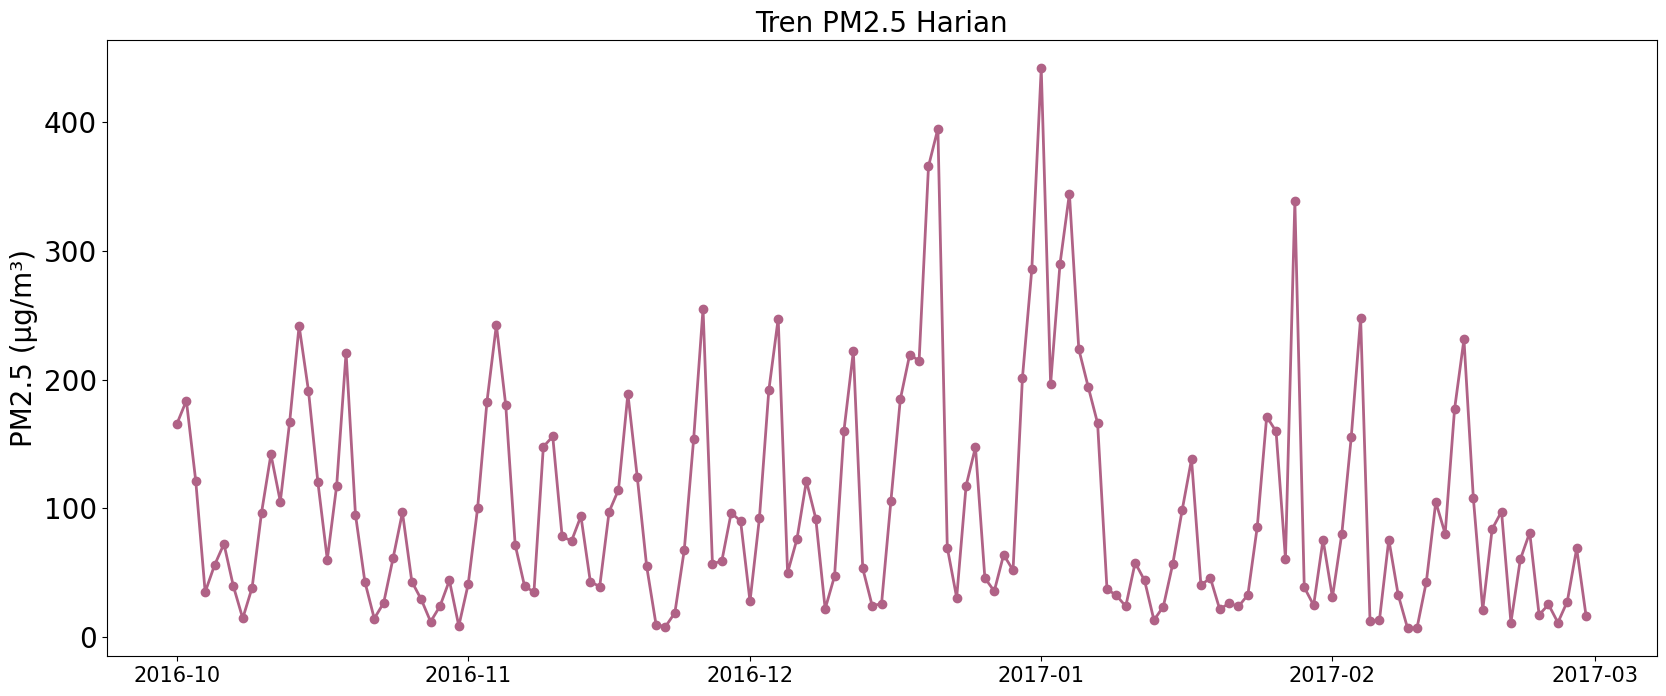

Penjelasan mengenai PM2.5:
 PM2.5 adalah partikel dengan diameter aerodinamis sama atau kurang dari 2,5μm. Menurut WHO, konsentrasi PM2.5 yang baik adalah <= 15μg/m³


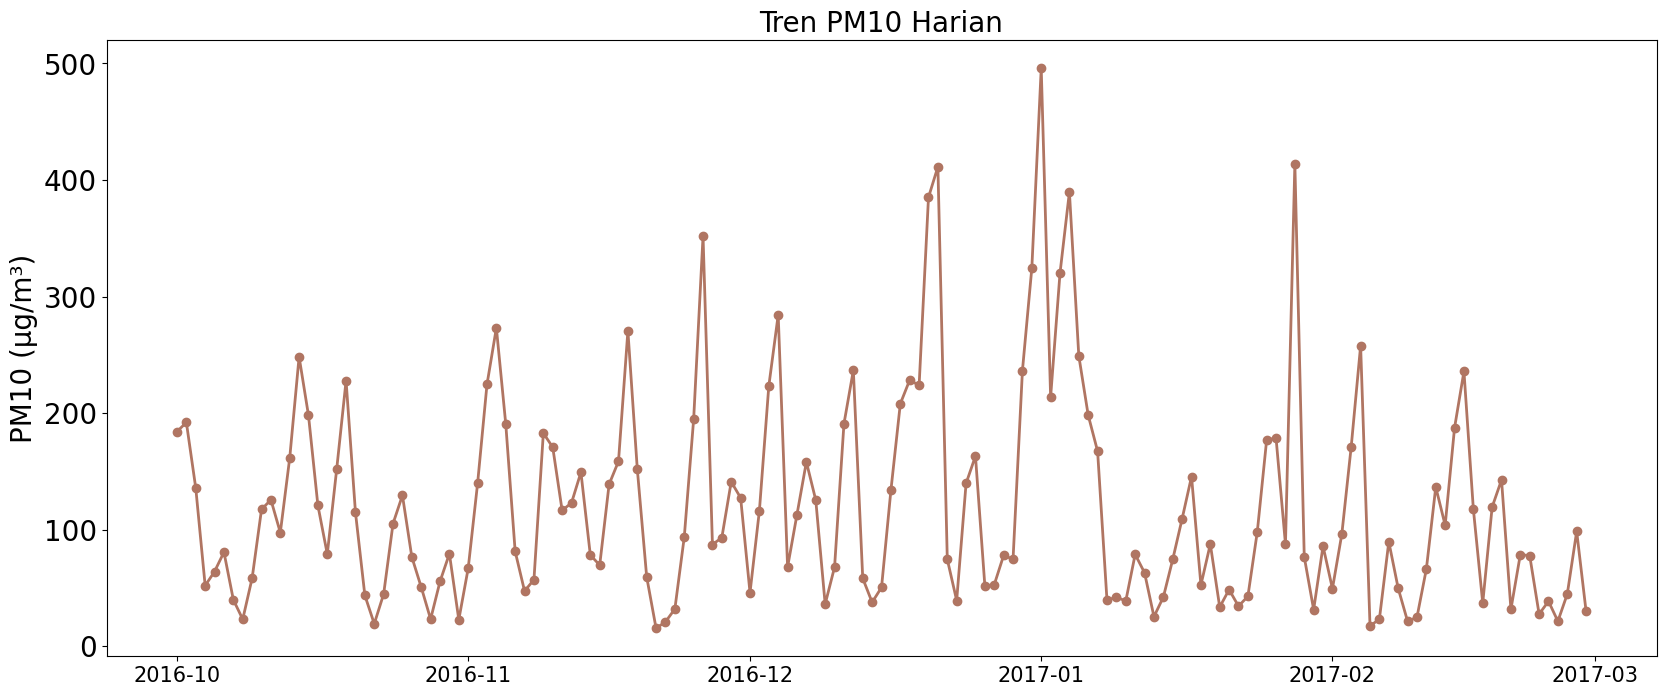

Penjelasan mengenai PM10:
PM10 adalah partikel dengan diameter aerodinamis sama atau kurang dari 10μm. Menurut WHO, konsentrasi PM10 yang baik adalah <= 45μg/m³


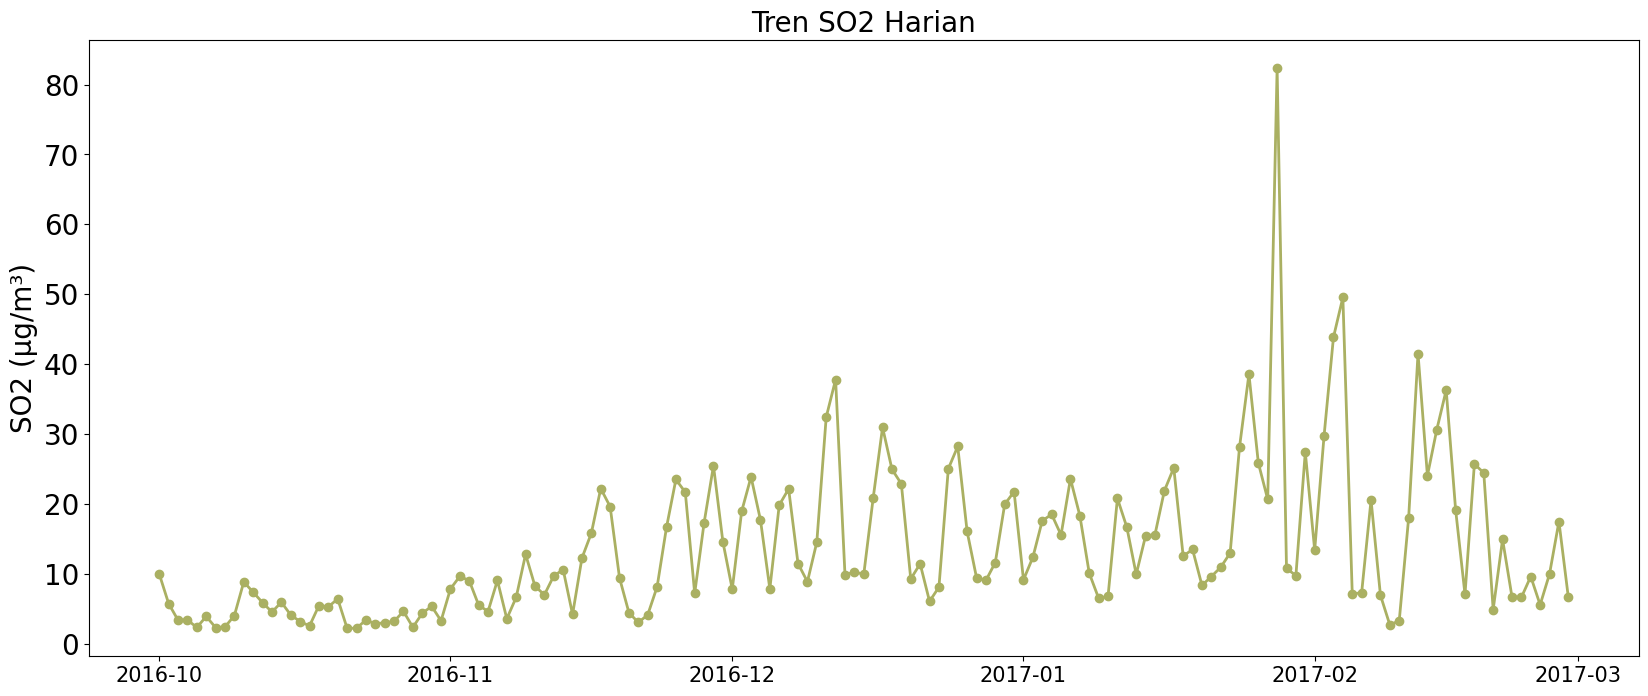

Penjelasan mengenai SO2:
Menurut WHO, konsentrasi sulfur dioksida (SO2) yang baik adalah <= 40 µg/m³


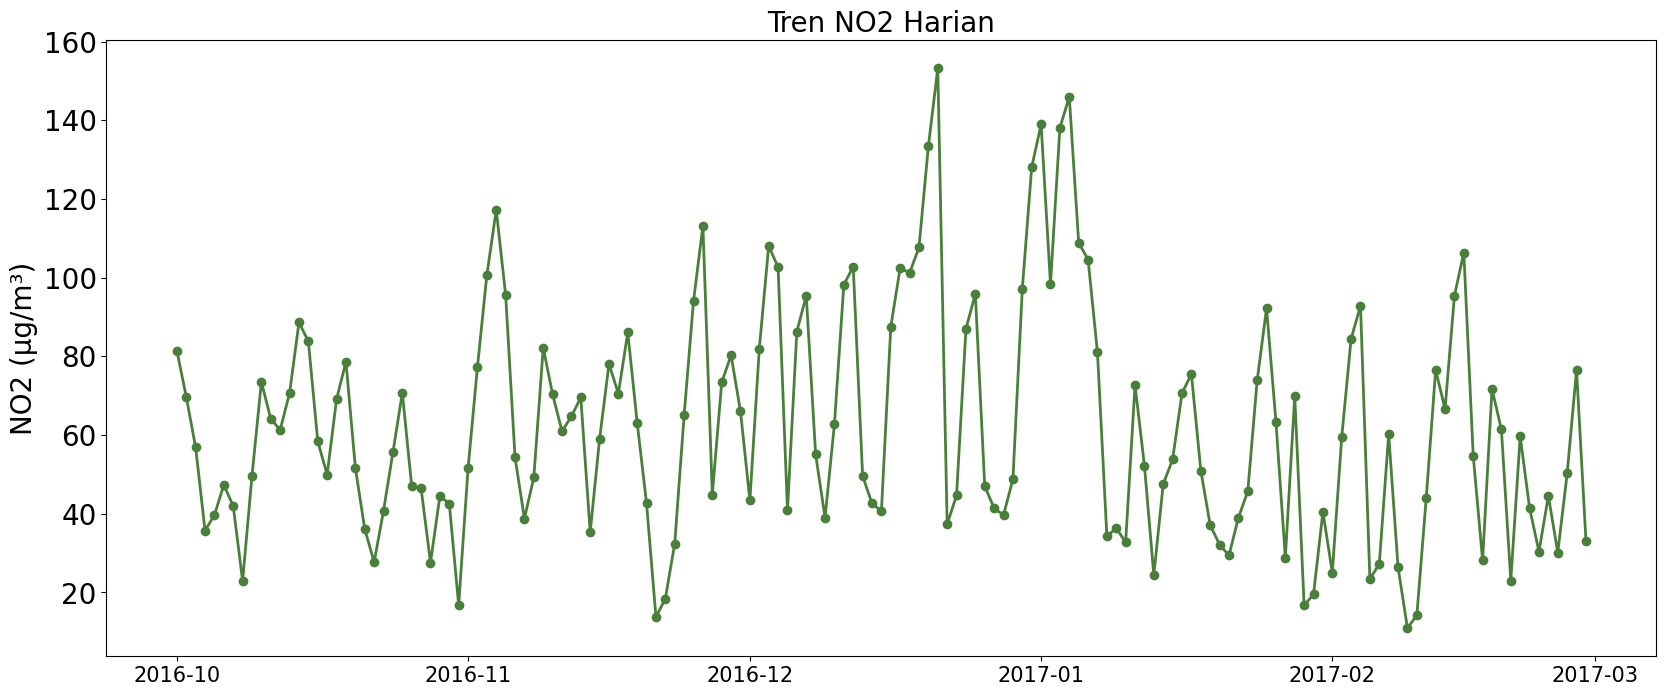

Penjelasan mengenai NO2:
Menurut WHO, konsentrasi Nitrogen DIoksida adalah <= 100 µg/m³


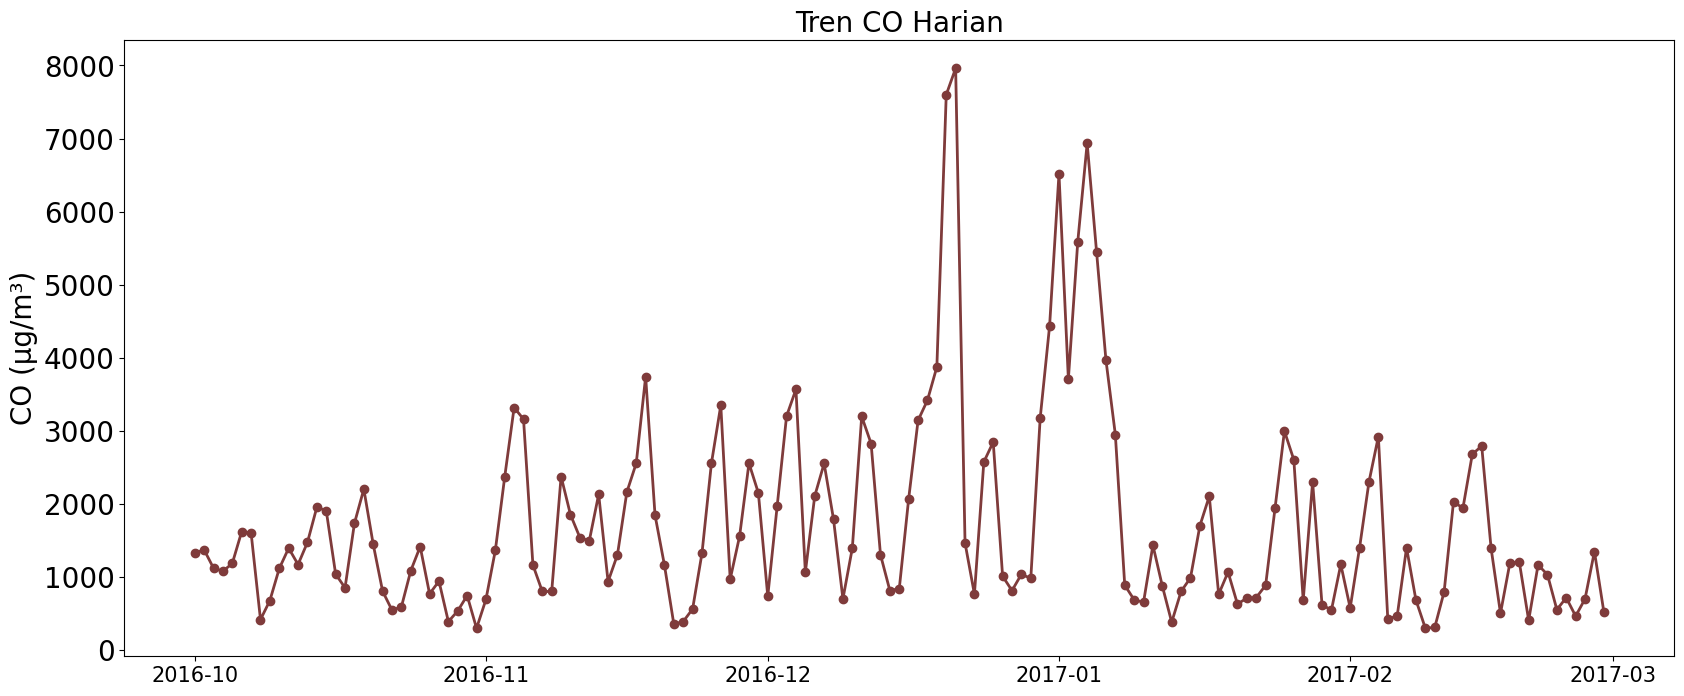

Penjelasan mengenai CO:
Menurut WHO, kosentrasi Karbon Monoksida (CO) adalah <= 4000µg/m³


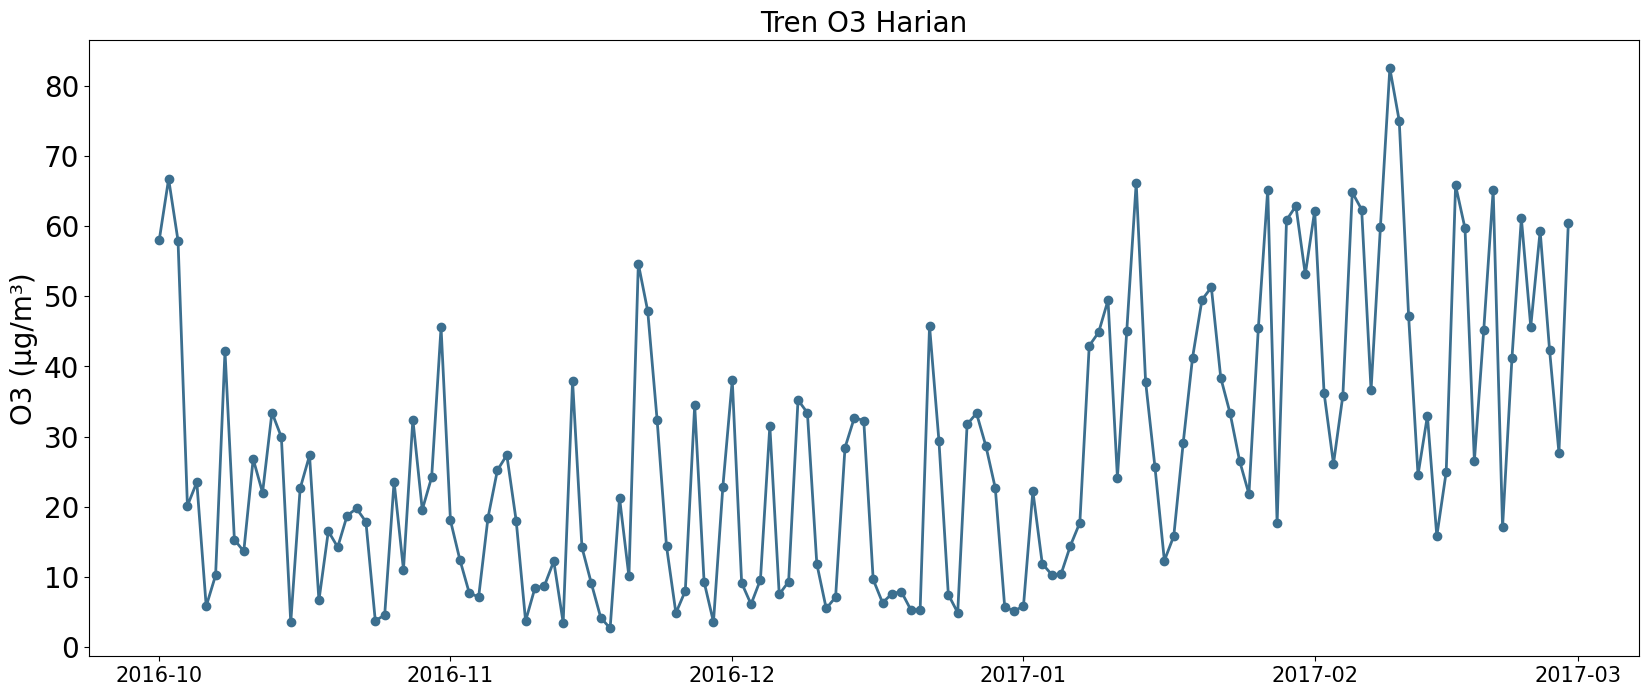

Penjelasan mengenai O3:
Menurut WHO, konsentrasi Ozone (O3) yang baik adalah <= 100μg/m³


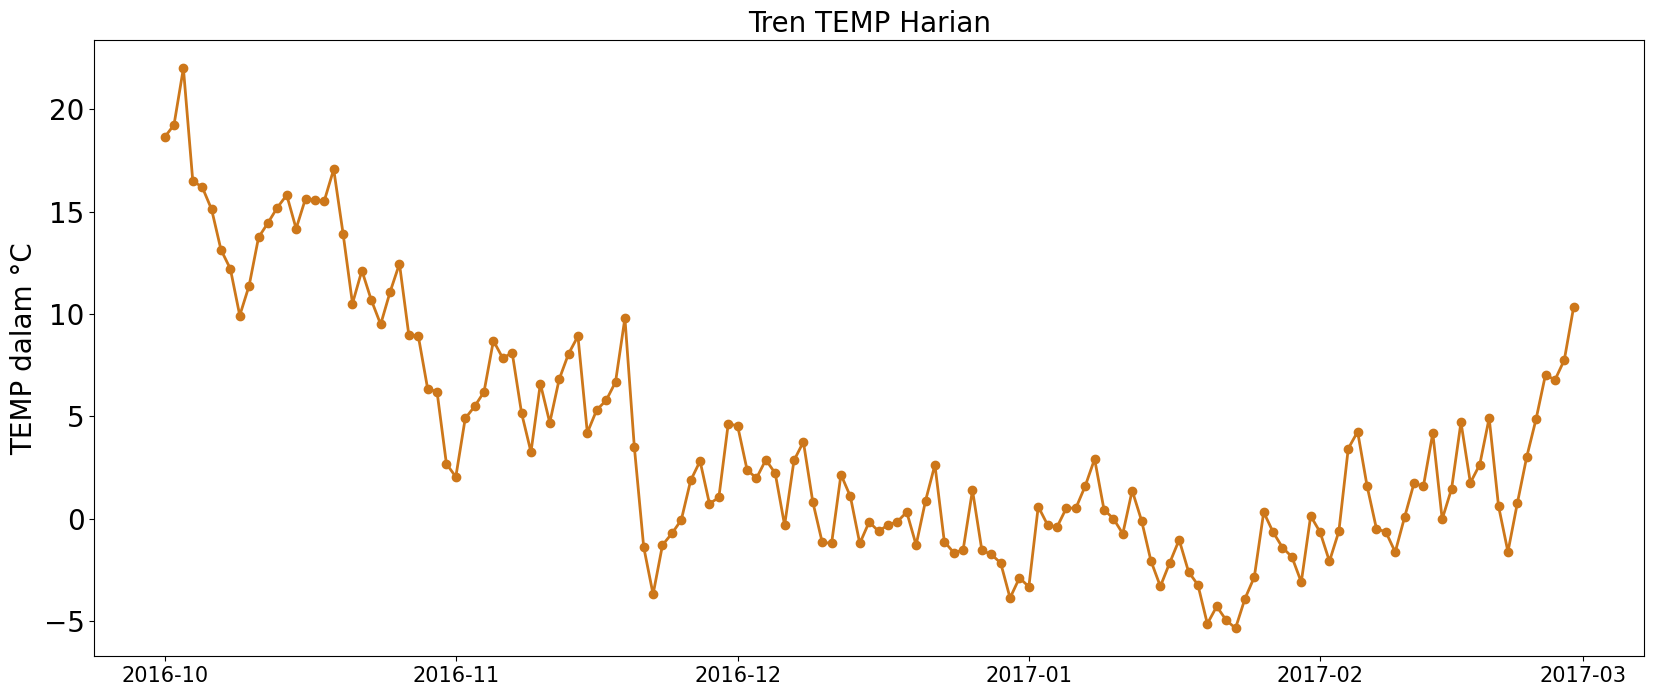

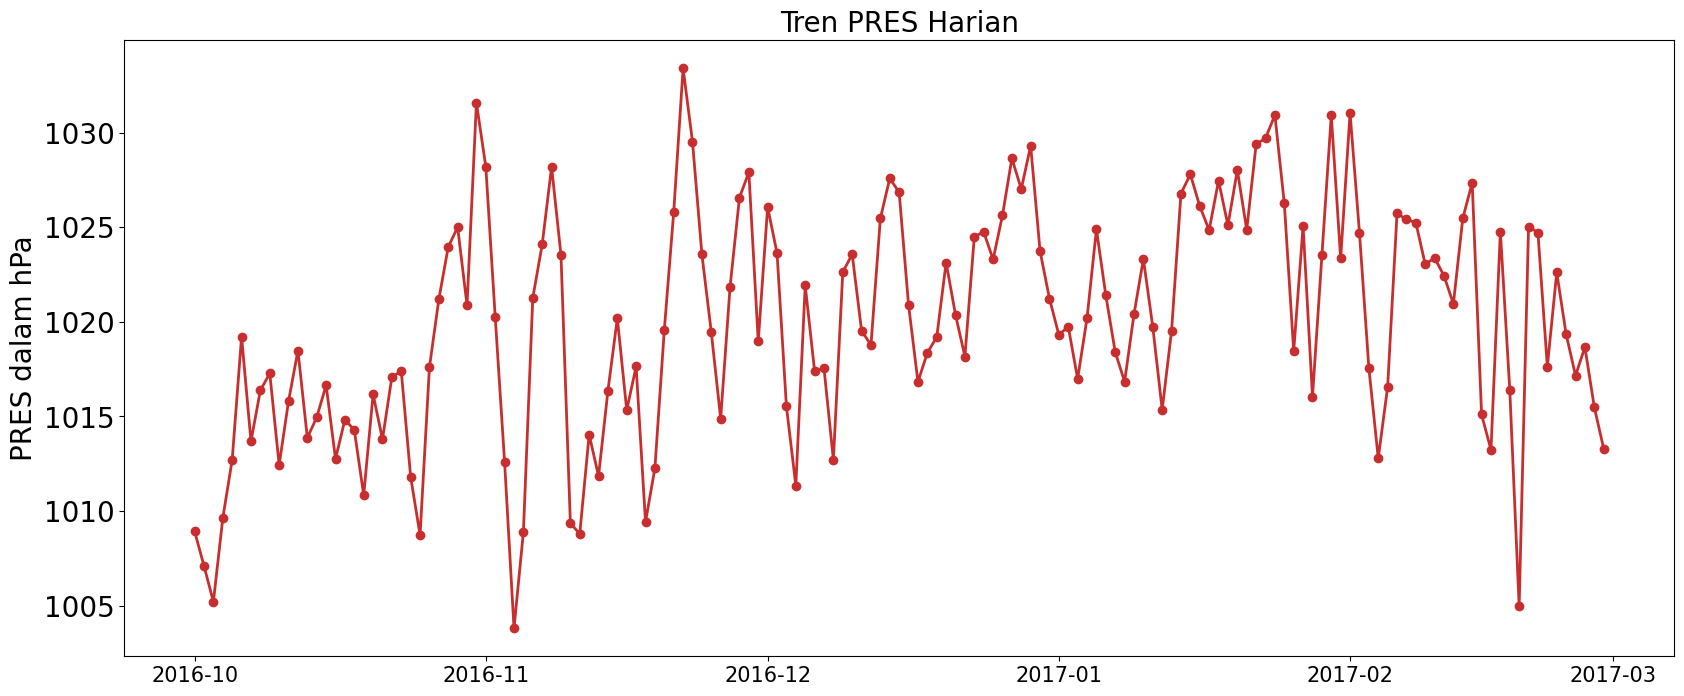

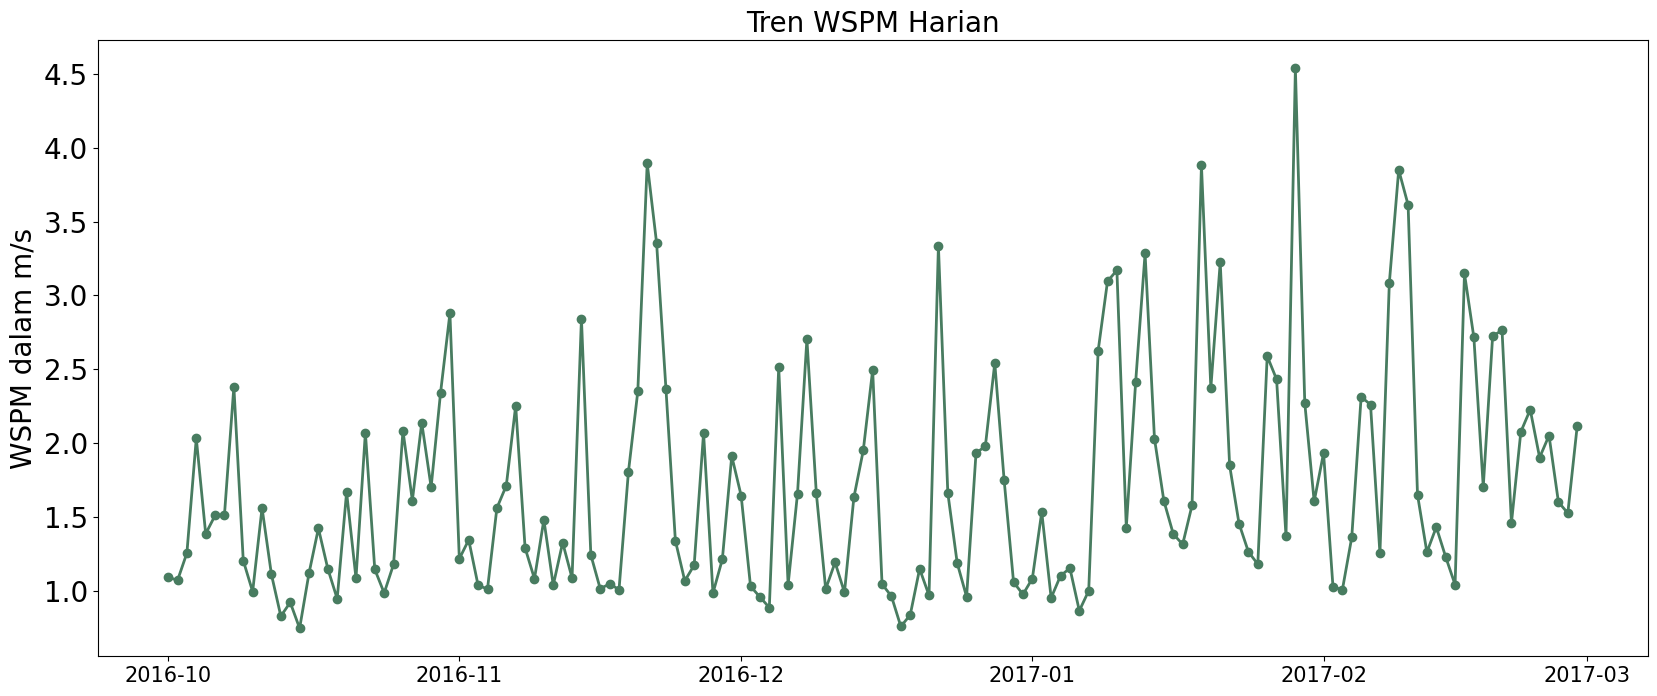

In [30]:
# Definisikan variabel dan warna yang sesuai
variables = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "WSPM"]
colors = ["#B06286", "#B07562", "#AAB062", "#497F3B", "#7F3B3B", "#3C6F8F", "#CD771A", "#C92E2E", "#487C60"]
PM25_ = " PM2.5 adalah partikel dengan diameter aerodinamis sama atau kurang dari 2,5μm. Menurut WHO, konsentrasi PM2.5 yang baik adalah <= 15μg/m³"
PM10_ = "PM10 adalah partikel dengan diameter aerodinamis sama atau kurang dari 10μm. Menurut WHO, konsentrasi PM10 yang baik adalah <= 45μg/m³"
SO2_ = "Menurut WHO, konsentrasi sulfur dioksida (SO2) yang baik adalah <= 40 µg/m³"
NO2_ = "Menurut WHO, konsentrasi Nitrogen DIoksida adalah <= 100 µg/m³"
CO_ = "Menurut WHO, kosentrasi Karbon Monoksida (CO) adalah <= 4000µg/m³"
O3_ = "Menurut WHO, konsentrasi Ozone (O3) yang baik adalah <= 100μg/m³"
penjelasan = {
    "PM2.5": PM25_,
    "PM10": PM10_,
    "SO2": SO2_,
    "NO2": NO2_,
    "CO": CO_,
    "O3": O3_
}

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

main_df.loc[:, 'date'] = pd.to_datetime(main_df['date'])
# Loop untuk membuat plot untuk setiap variabel
for variable, color in zip(variables, colors):
    plt.figure(figsize=(20, 8))
    plt.plot(
        main_df["date"],
        main_df[variable],
        marker='o', 
        linewidth=2,
        color=color  # Gunakan warna yang sesuai dengan variabel
    )
    plt.tick_params(axis='y', labelsize=20)
    plt.tick_params(axis='x', labelsize=15, )
    plt.ylabel(f"{variable} (μg/m³)" if variable in ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
                else f"{variable} dalam °C" if variable == "TEMP"
                else f"{variable} dalam hPa" if variable == "PRES"
                else f"{variable} dalam m/s", fontsize=20)
    plt.title(f"Tren {variable} Harian", fontsize=20)
    plt.show()
    if variable in ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]:
        print(f"Penjelasan mengenai {variable}:")
        print(penjelasan[variable])


### Pertanyaan 3: Bagaimana korelasi antara polutan dengan variabel meteorologi?

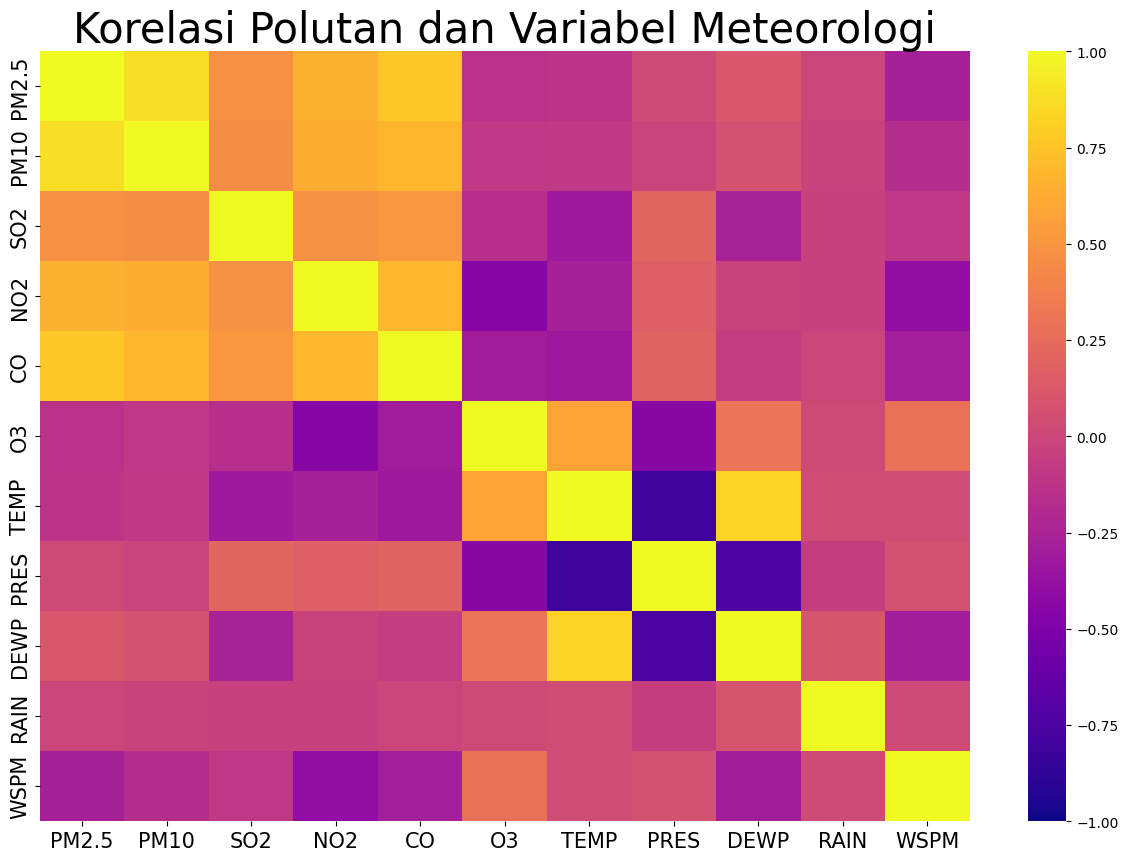

In [31]:
# menampilkan grafik korelasi heatmap
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(korelasi, vmax = 1, vmin = -1, center = 0, cmap = "plasma")
ax.tick_params(labelsize = 15)
ax.set_title("Korelasi Polutan dan Variabel Meteorologi", loc="center", fontsize=30)

plt.show()

### Pertanyaan 4: Bagaimana kualitas udara di berbagai stasiun di Beijing?

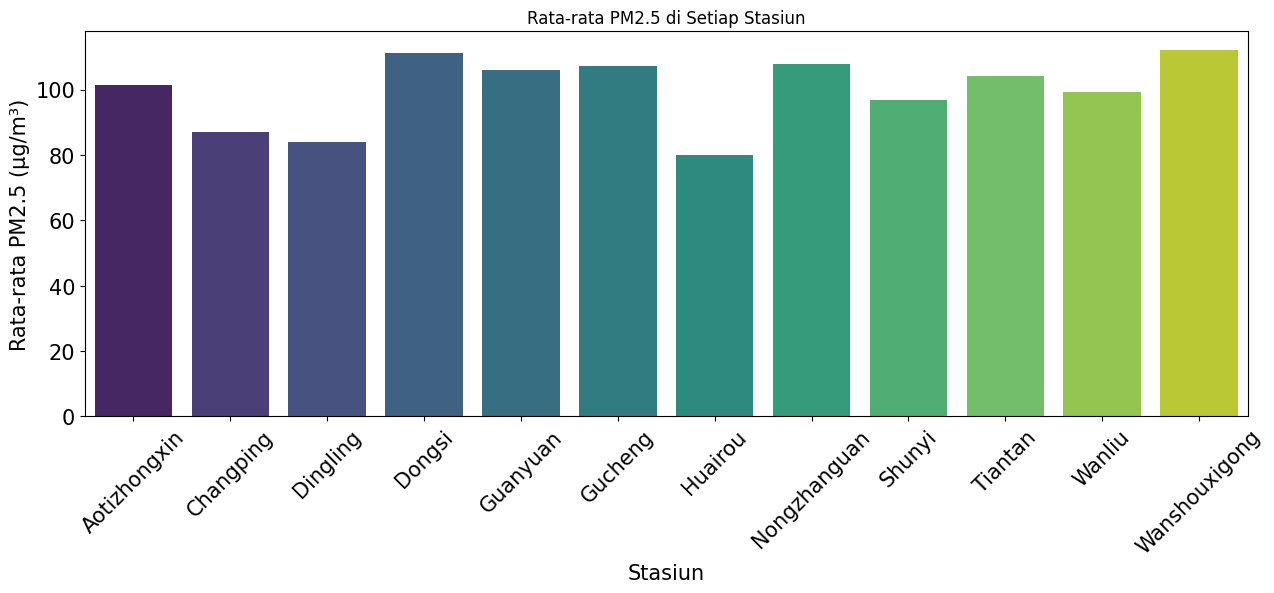

 PM2.5 adalah partikel dengan diameter aerodinamis sama atau kurang dari 2,5μm. Menurut WHO, konsentrasi PM2.5 yang baik adalah <= 15μg/m³


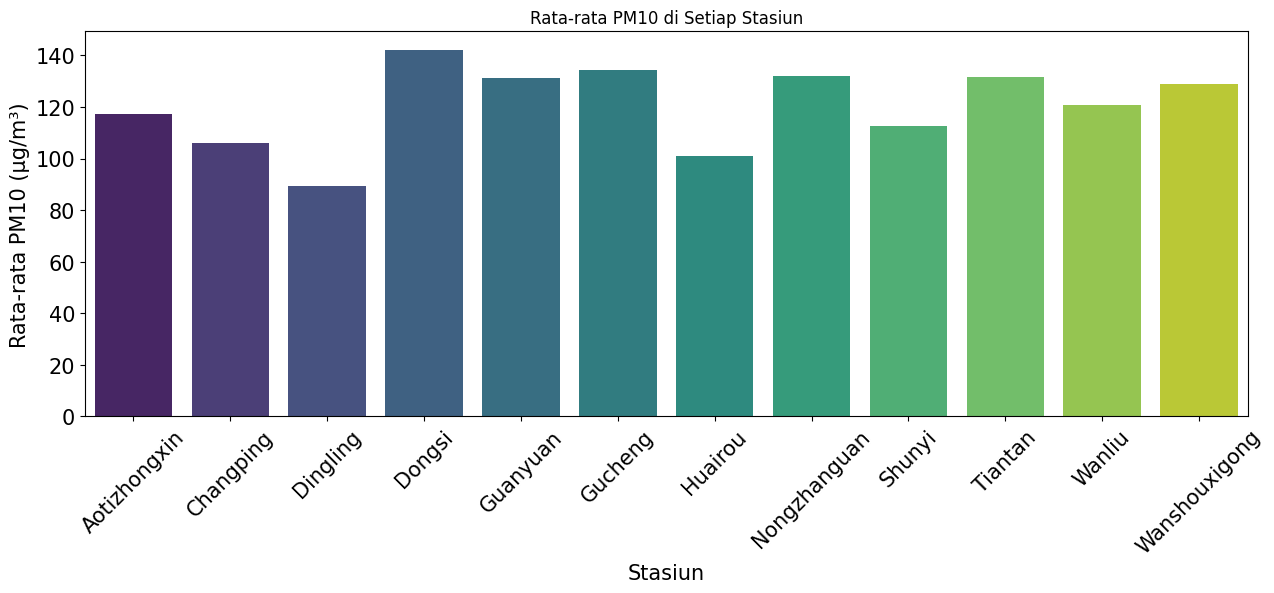

PM10 adalah partikel dengan diameter aerodinamis sama atau kurang dari 10μm. Menurut WHO, konsentrasi PM10 yang baik adalah <= 45μg/m³


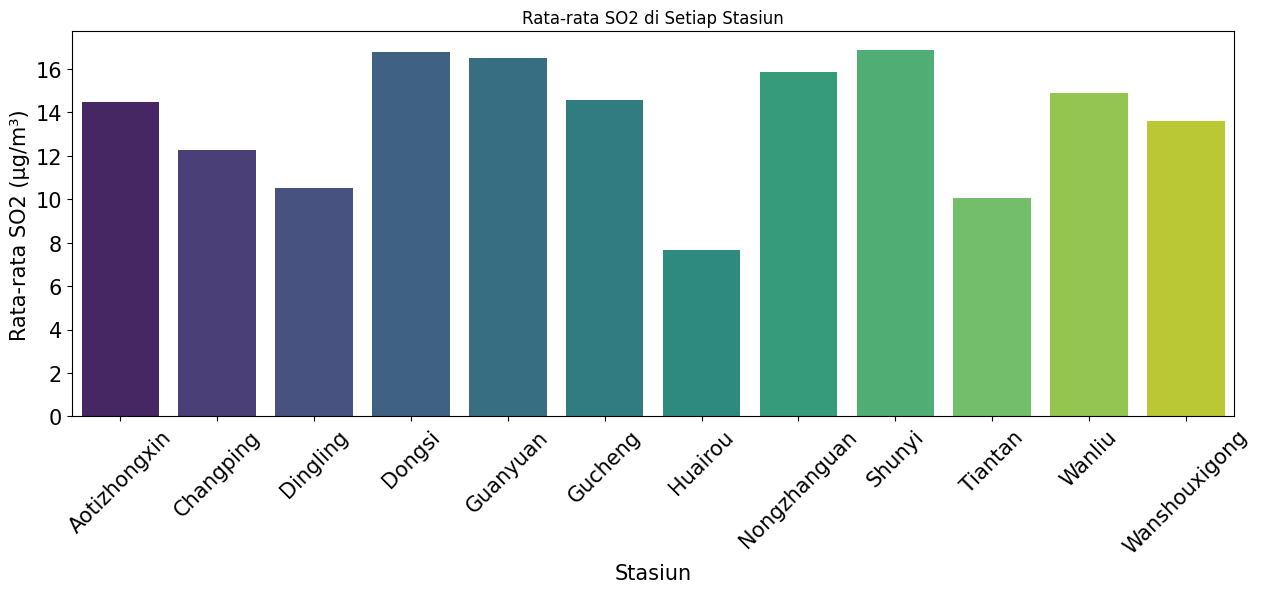

Menurut WHO, konsentrasi sulfur dioksida (SO2) yang baik adalah <= 40 µg/m³


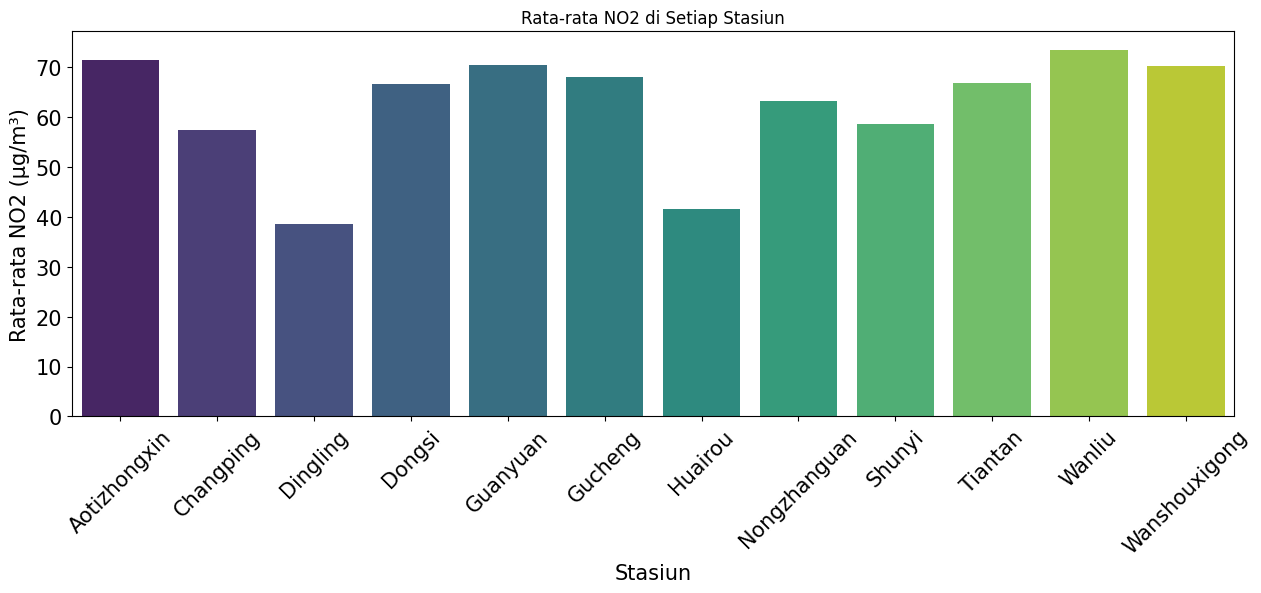

Menurut WHO, konsentrasi Nitrogen DIoksida adalah <= 100 µg/m³


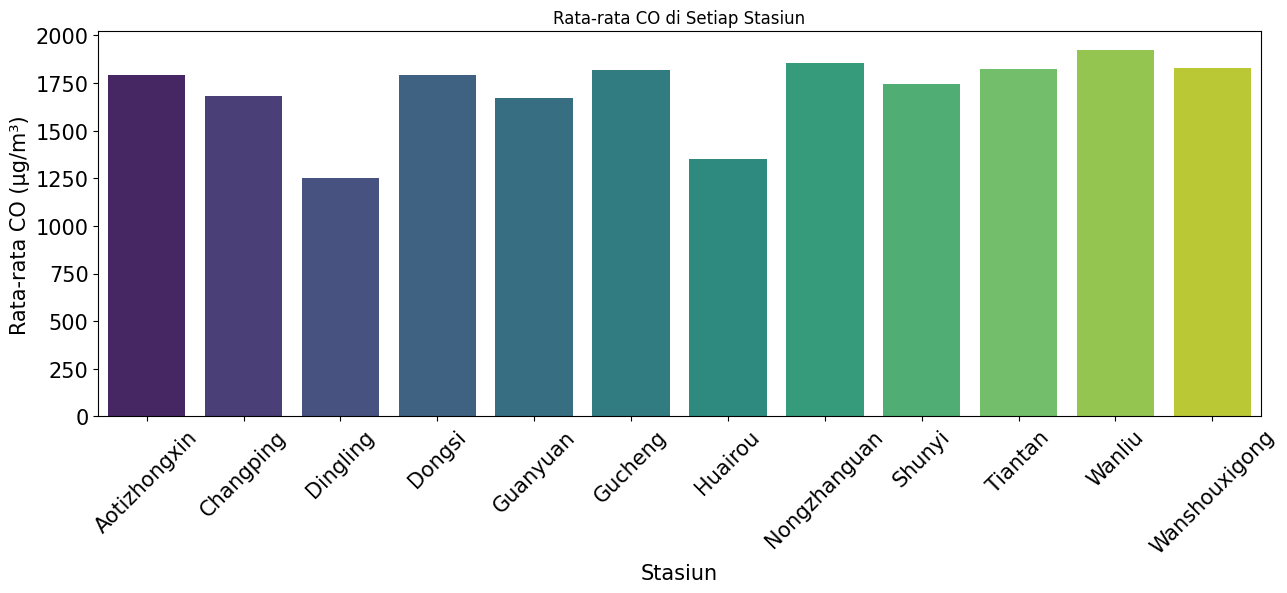

Menurut WHO, kosentrasi Karbon Monoksida (CO) adalah <= 4000µg/m³


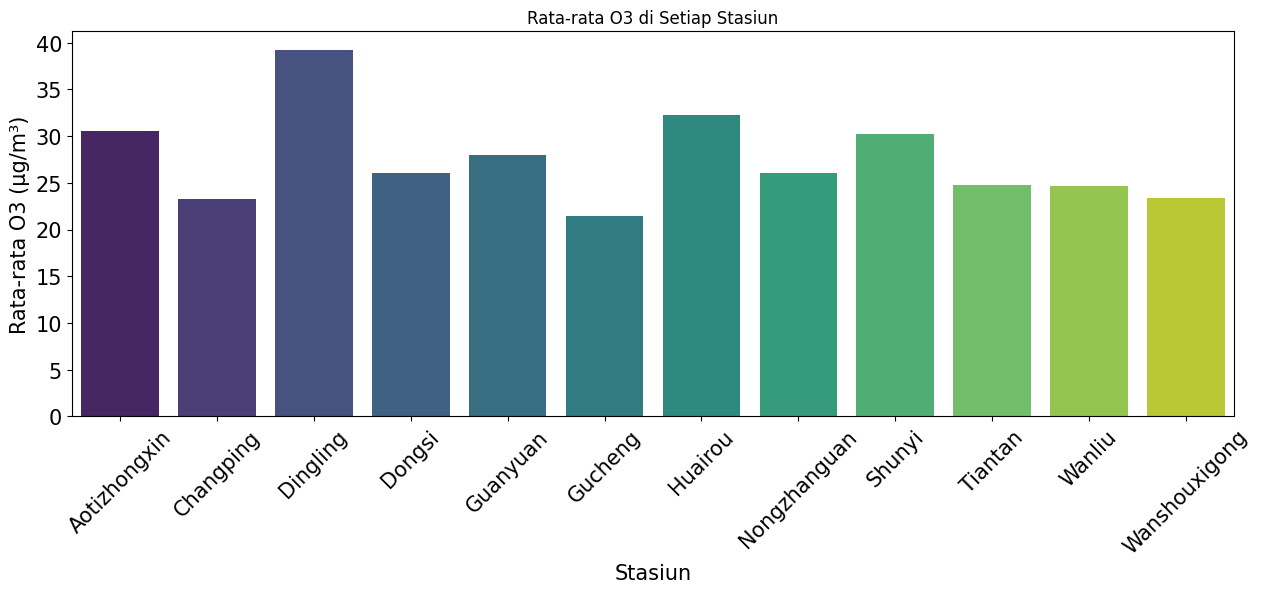

Menurut WHO, konsentrasi Ozone (O3) yang baik adalah <= 100μg/m³


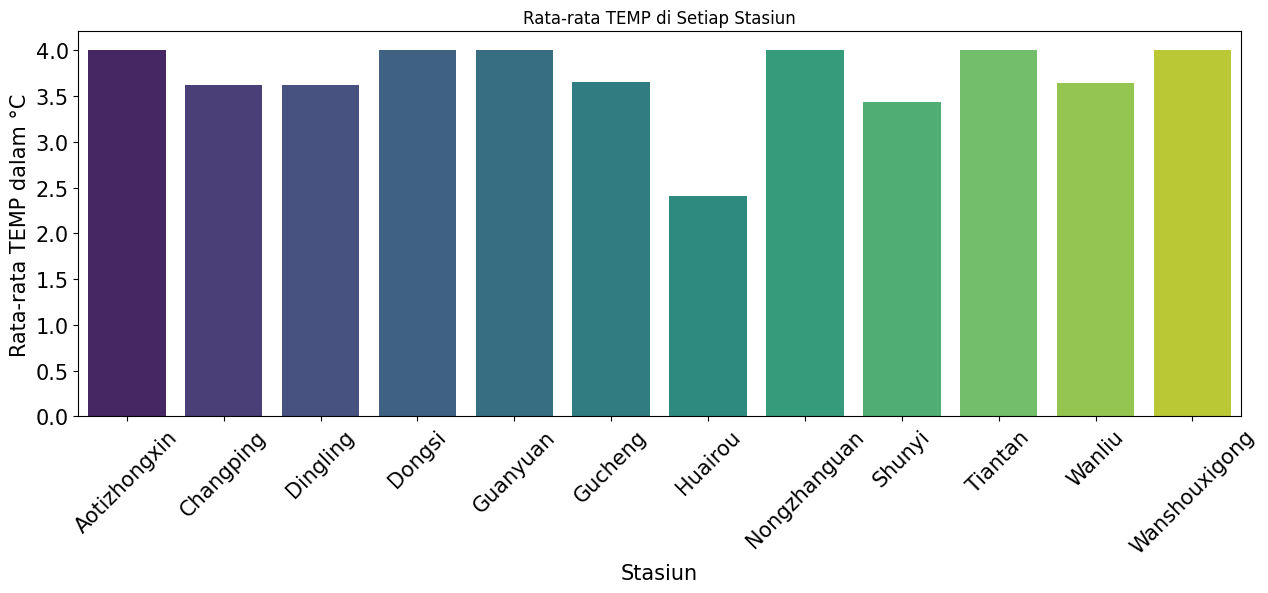

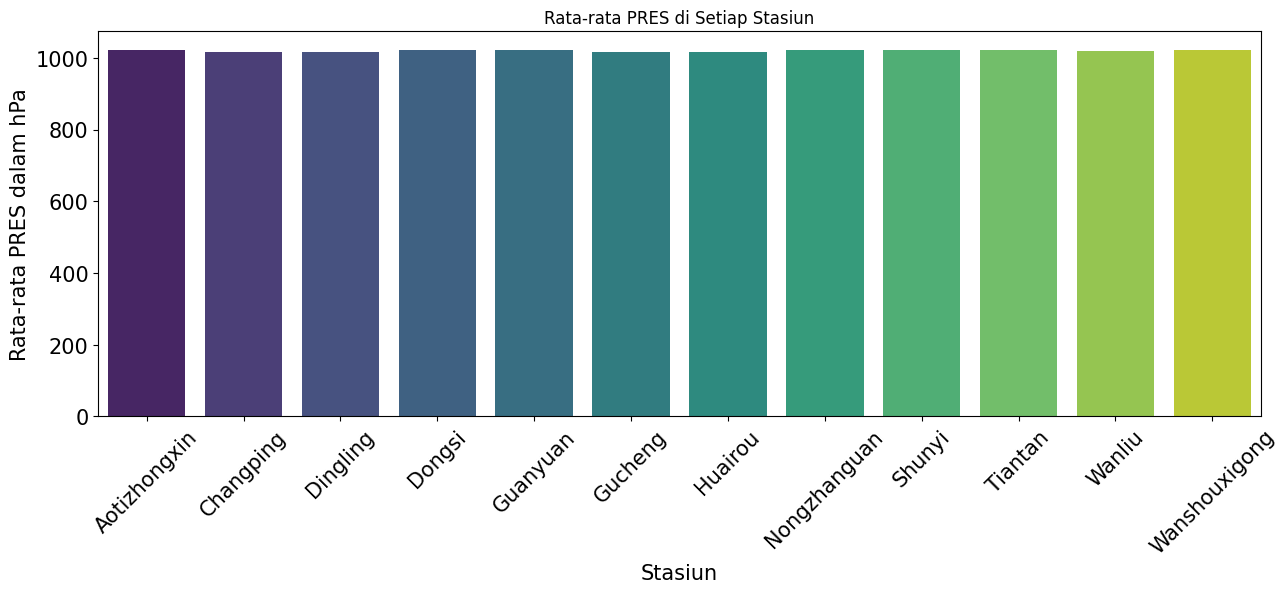

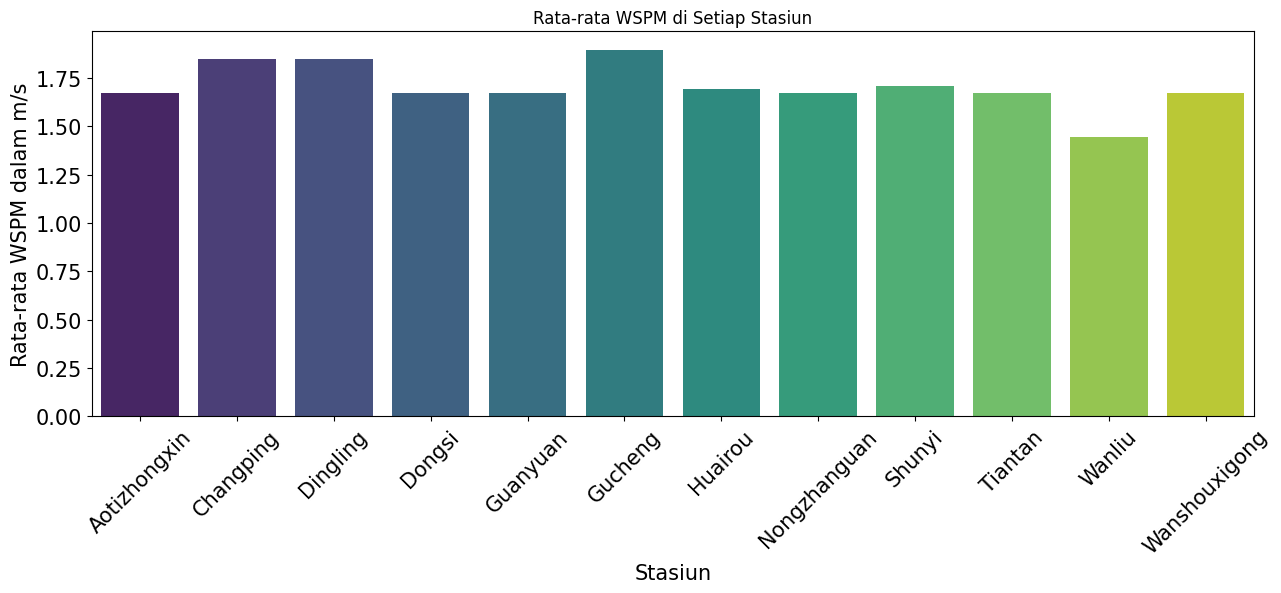

In [32]:
start_date = datetime(2016, 10, 1)
end_date = all_day["date"].max()

#bikin stations_df yang udah terfilter ceritanya
stations_df = all_day_station[(all_day_station["date"] >= str(start_date)) & 
                (all_day_station["date"] <= str(end_date))]

# Menghitung rata-rata setiap variabel di setiap stasiun
station_avg = stations_df.groupby('station')[variables].mean()

# Membuat plot grafik bar untuk setiap variabel
for variable in variables:
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.barplot(x=station_avg.index, y=station_avg[variable],  hue=station_avg.index, palette="viridis", legend=False)
    ax.set_ylabel(f"Rata-rata {variable} (μg/m³)" if variable in ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
                    else f"Rata-rata {variable} dalam °C" if variable == "TEMP"
                    else f"Rata-rata {variable} dalam hPa" if variable == "PRES"
                    else f"Rata-rata {variable} dalam m/s", fontsize=15)
    ax.set_xlabel("Stasiun", fontsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.tick_params(axis='x', labelsize=15, rotation=45)
    ax.set_title(f"Rata-rata {variable} di Setiap Stasiun")
    plt.show()
    if variable in ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]:
        print(penjelasan[variable])


### Pertanyaan 5: Bagaimana tren partikel per-jam?

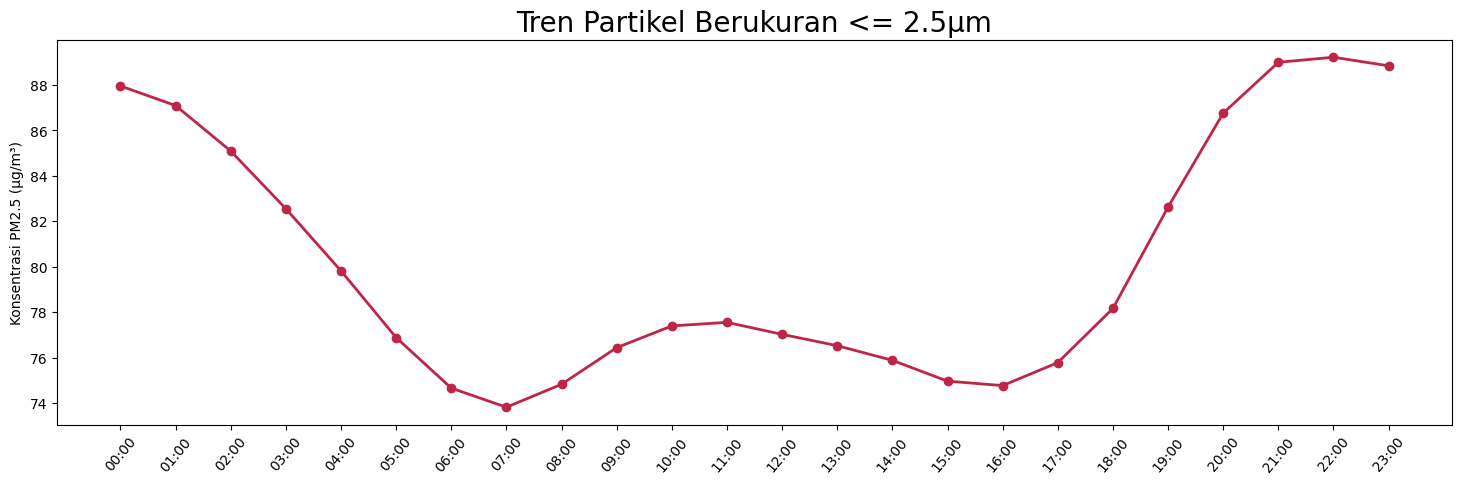

In [33]:
plt.figure(figsize=(18,5))
plt.plot(jam_df["hour_str"], jam_df['PM2.5'],
         marker='o', linewidth=2, color='#BE2546')
plt.title("Tren Partikel Berukuran <= 2.5μm", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=50)
plt.yticks(fontsize=10)
plt.ylabel('Konsentrasi PM2.5 (μg/m³)', fontsize=10)
plt.show()

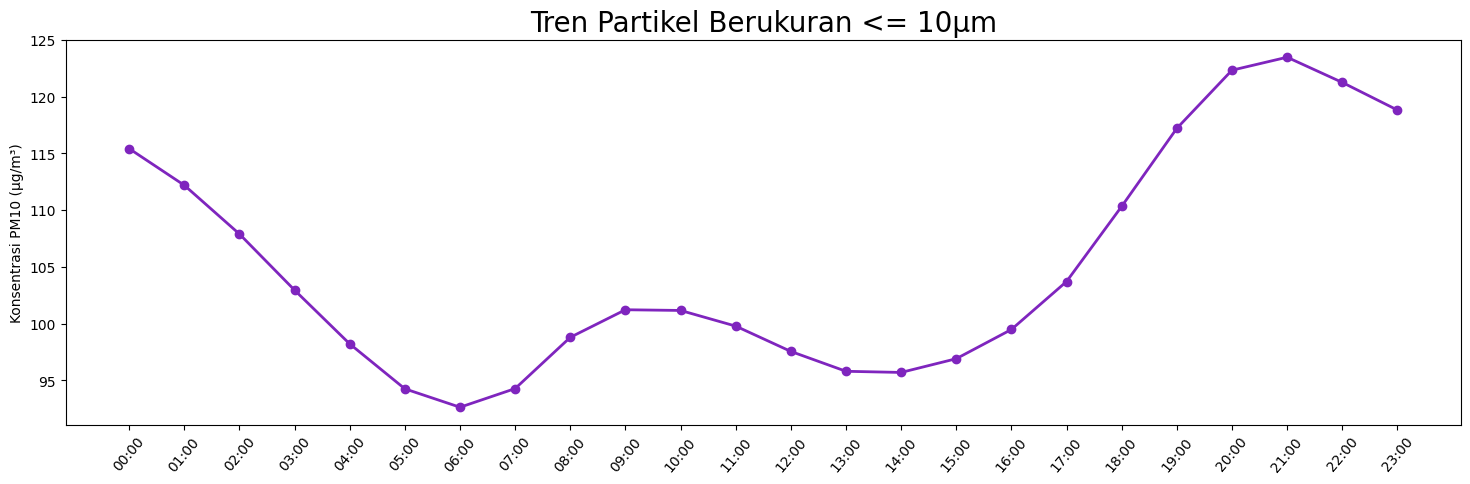

In [34]:
plt.figure(figsize=(18,5))
plt.plot(jam_df["hour_str"], jam_df['PM10'],
         marker='o', linewidth=2, color='#7F25BE')
plt.title("Tren Partikel Berukuran <= 10μm", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=50)
plt.yticks(fontsize=10)
plt.ylabel('Konsentrasi PM10 (μg/m³)', fontsize=10)
plt.show()

## Conclusion

- Jumlah partikel berukuran <= 2.5μm dan <= 10μm cenderung naik saat musim gugur dan musim dingin
- Jumlah SO2 di udara Beijing cenderung naik saat musim dingin, namun jumlahnya semakin menurun setiap tahun
- Jumlah NO2 dan CO pun cenderung naik saat musim dingin
- Jumlah O3 berkebalikan dengan yang  lainnnya, cenderung turun saat musim dingin dan naik saat musim panas
- Suhu di Beijing naik saat musim panas dan turun saat musim dingin seperti yang seharusnya. Sementara tekanan berkebalikannya.
- Kecepatan angin cenderung lebih bervariasi sepanjang tahun
- Tidak ada korelasi yang signifikan (> 0.50) antara parameter meteorologi dengan jumlah polutan-polutan di udara
- Guchen dan Guanyuan merupakan stasiun di Beijing dengan rata-rata jumlah polutan terbanyak. Namun nilai ini tidak berbeda signifikan dengan stasiun-stasiun lain
- Semua stasiun di Beijing ini berkategori tidak sehat berdasarkan konsentrasi PM 2.5 dan M 10
- Konsentrasi PM2.5 dan PM10 cenderung naik saat malam hari

In [35]:
all_month.to_csv("all_month.csv", index=False)
correlation_df.to_csv("correlation.csv", index=False)
jam_df.to_csv("jam.csv", index=False)
all_day.to_csv("all_day.csv", index=False)
all_day_station.to_csv("all_day_station.csv", index=False)
all_year.to_csv("all_year.csv", index=False)